# HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.`

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Data Analysis

In [3]:
pd.set_option("display.max_rows", None)  
pd.set_option("display.max_columns", None)
df.head(5)  # checking first 5 elements of the dataset

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
df.tail(5)  # checking last 5 elements of the dataset

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [5]:
df.sample(5) # checking random 5 elements of the dataset

Age Attrition BusinessTravel  DailyRate              Department  \
1052   30        No     Non-Travel        990  Research & Development   
1194   47        No  Travel_Rarely       1225                   Sales   
50     48       Yes  Travel_Rarely        626  Research & Development   
389    37        No  Travel_Rarely       1305  Research & Development   
289    28        No  Travel_Rarely       1117  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1052                 7          3  Technical Degree              1   
1194                 2          4     Life Sciences              1   
50                   1          2     Life Sciences              1   
389                 10          4     Life Sciences              1   
289                  8          2     Life Sciences              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
1052            1482                        3    Male          64   
1194            1676                        2  Female          47   
50                64                        1    Male          98   
389              518                        3    Male          49   
289              395                        4  Female          66   

      JobInvolvement  JobLevel                 JobRole  JobSatisfaction  \
1052               3         1      Research Scientist                3   
1194               4         4                 Manager                2   
50                 2         3   Laboratory Technician                3   
389                3         2  Manufacturing Director                2   
289                3         1      Research Scientist                4   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1052      Divorced           1274         7152                   1      Y   
1194      Divorced          15972        21086                   6      Y   
50          Single           5381        19294                   9      Y   
389         Single           4197        21123                   2      Y   
289         Single           3310         4488                   1      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1052       No                 13                  3                         2   
1194       No                 14                  3                         3   
50        Yes                 13                  3                         4   
389       Yes                 12                  3                         4   
289        No                 21                  4                         4   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1052             80                 2                  1   
1194             80                 3                 29   
50               80                 0                 23   
389              80                 0                 18   
289              80                 0                  5   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1052                      2                2               1   
1194                      2                3               3   
50                        2                3               1   
389                       2                2               1   
289                       3                3               5   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1052                   0                        0                     0  
1194                   2                        1                     2  
50                     0                        0                     0  
389                    0                        0                     1  
289                    3                        0                     2

In [6]:
print(df.shape)  # checking shape of the dataset
# (1470, 35)

(1470, 35)


#### Checking some more dataset rows for better understandings

In [7]:
df.head(50)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   
15   29        No      Travel_Rarely       1389  Research & Development   
16   32        No      Travel_Rarely        334  Research & Development   
17   22        No         Non-Travel       1123  Research & Development   
18   53        No      Travel_Rarely       1219                   Sales   
19   38        No      Travel_Rarely        371  Research & Development   
20   24        No         Non-Travel        673  Research & Development   
21   36       Yes      Travel_Rarely       1218                   Sales   
22   34        No      Travel_Rarely        419  Research & Development   
23   21        No      Travel_Rarely        391  Research & Development   
24   34       Yes      Travel_Rarely        699  Research & Development   
25   53        No      Travel_Rarely       1282  Research & Development   
26   32       Yes  Travel_Frequently       1125  Research & Development   
27   42        No      Travel_Rarely        691                   Sales   
28   44        No      Travel_Rarely        477  Research & Development   
29   46        No      Travel_Rarely        705                   Sales   
30   33        No      Travel_Rarely        924  Research & Development   
31   44        No      Travel_Rarely       1459  Research & Development   
32   30        No      Travel_Rarely        125  Research & Development   
33   39       Yes      Travel_Rarely        895                   Sales   
34   24       Yes      Travel_Rarely        813  Research & Development   
35   43        No      Travel_Rarely       1273  Research & Development   
36   50       Yes      Travel_Rarely        869                   Sales   
37   35        No      Travel_Rarely        890                   Sales   
38   36        No      Travel_Rarely        852  Research & Development   
39   33        No  Travel_Frequently       1141                   Sales   
40   35        No      Travel_Rarely        464  Research & Development   
41   27        No      Travel_Rarely       1240  Research & Development   
42   26       Yes      Travel_Rarely       1357  Research & Development   
43   27        No  Travel_Frequently        994                   Sales   
44   30        No  Travel_Frequently        721  Research & Development   
45   41       Yes      Travel_Rarely       1360  Research & Development   
46   34        No         Non-Travel       1065                   Sales   
47   37        No      Travel_Rarely        408  Research & Development   
48   46        No  Travel_Frequently       1211                   Sales   
49   35        No      Travel_Rarely       1229  Research & Development   

    DistanceFromHome  Education    EducationField  EmployeeCount  \
0                  1          2     Life Sciences              1   
1                  8          1     Life S

In [8]:
df.columns  # checking columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Rearranging columns dataset for better understanding how different variable effects on target variabel

In [9]:
df = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']]  # Attrition set on last column
df.head(5)

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  
0                        0                     5       Yes  
1                        1                     7        No  
2                        0                     0       Yes  
3                        3                     0        No  
4                        2                     2        No

In [10]:
df.dtypes  # checking datatypes of the dataset

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

#### From above observations we find that 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Attrition' having object data type values and rest other variable are of integer types.

# Checking Null Values

In [11]:
df.isnull().sum() # checking Null value sums of different column dataset

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

<AxesSubplot:>

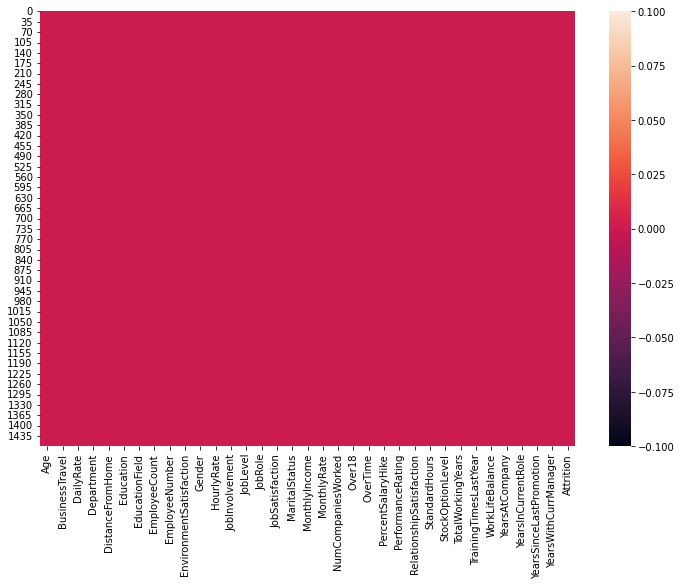

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull())

#### From above graph we find that there is no null value present in the dataset.

### Summary of the Dataset

In [13]:
df.info()  # basic summary of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [14]:
df.describe() # quick summary of dataset

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

<AxesSubplot:>

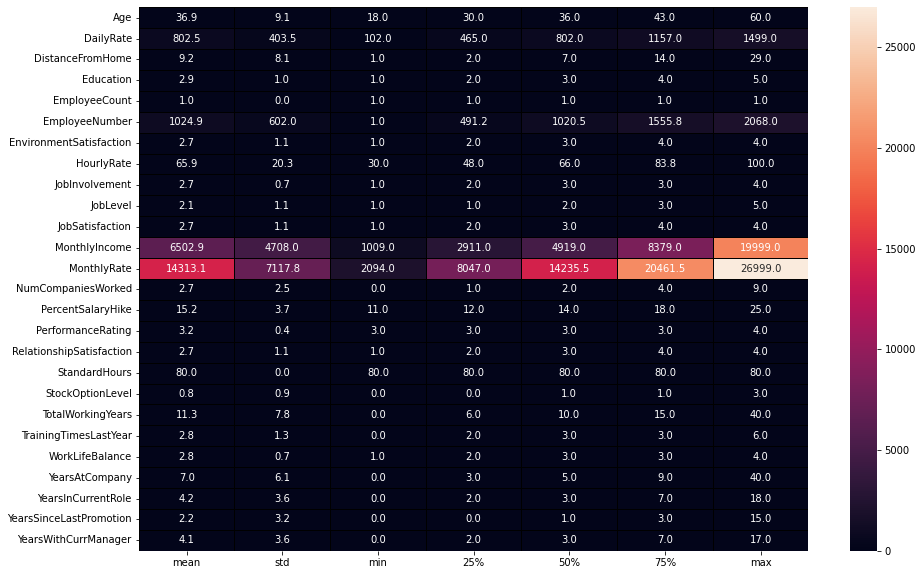

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), linewidths = 1, linecolor = 'black', annot = True, fmt = '.1f' )

#### From above information we find that max values of MonthlyRate, MonthlyIncome are much higher than its overall values. Due to these MonthlyRate, MonthlyIncome probably having outliers in the dataset.

#### 

# Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [17]:
df.drop_duplicates(inplace = True)   # dropping duplicate values for improved dataset 

In [18]:
df.shape   # we find that there is no duplicate values present in the dataset

(1470, 35)

#### Dividing columns into object and integer categories for easy visualization understandings

In [19]:
df_object = df.select_dtypes(include = 'object').columns  # object dataset columns
df_integer = df.select_dtypes(exclude = 'object').columns  # integer dataset columns

In [20]:
df_object # checking

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition'],
      dtype='object')

In [21]:
df_integer

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Checking unique values of the dataset

In [22]:
for i in df_object:
    print(i,'\n' ,df[i].unique())  # checking unique values

BusinessTravel 
 ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department 
 ['Sales' 'Research & Development' 'Human Resources']
EducationField 
 ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender 
 ['Female' 'Male']
JobRole 
 ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus 
 ['Single' 'Married' 'Divorced']
Over18 
 ['Y']
OverTime 
 ['Yes' 'No']
Attrition 
 ['Yes' 'No']


#### 

# Univariate Analysis and with respect to Target Variable

# Business Travel

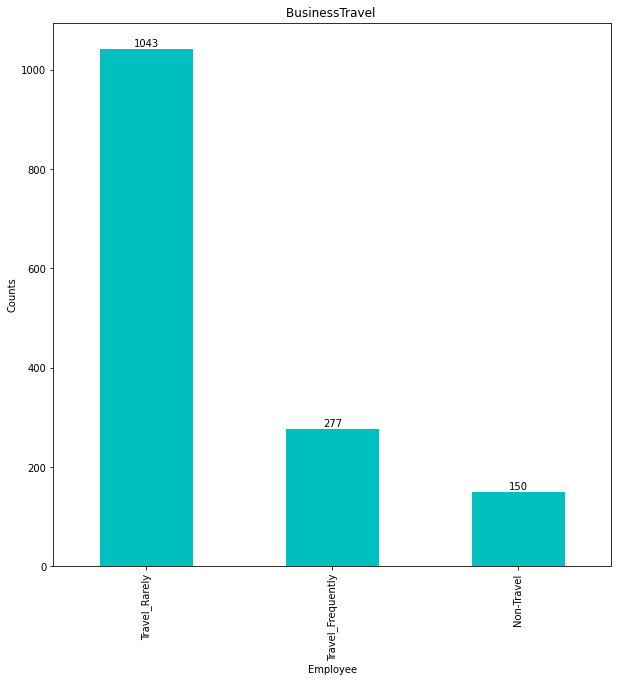

In [23]:
BusinessTravel = df.BusinessTravel.value_counts()
plt.figure(figsize = (10,10))
df_travel = BusinessTravel.plot(kind = 'bar', color = 'c')
df_travel.set_title('BusinessTravel ')
df_travel.set_xlabel('Employee')
df_travel.set_ylabel('Counts')


for i in df_travel.containers:
    df_travel.bar_label(i)

#### From above dataset we find that 1043 employee travel rarely, 277 employee travel frequently and 150 employee non travel.

### Percentage of Business Travel

<AxesSubplot:ylabel='BusinessTravel'>

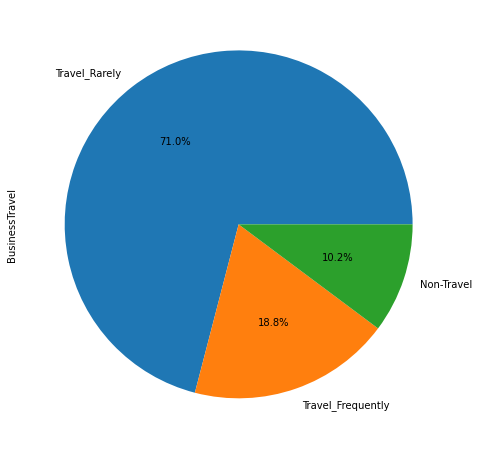

In [24]:
plt.figure(figsize = (8,8))
BusinessTravel.plot(kind = 'pie', autopct = '%1.1f%%')

#### From above graph we find that 71.0 percent of the employee travel rarely and 18.8 percent of employee travel frequently rest 10.2 percent employee non travel.

#### 

# Business Travel with respect to Attrition

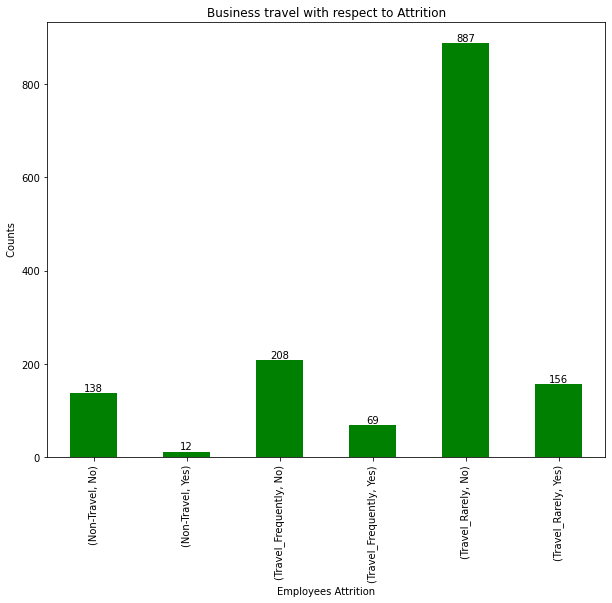

In [25]:
business_travel = df.groupby('BusinessTravel')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_business_travel = business_travel.plot(kind = 'bar', color = 'g')
df_business_travel.set_title("Business travel with respect to Attrition")
df_business_travel.set_xlabel("Employees Attrition")
df_business_travel.set_ylabel(" Counts")

for i in df_business_travel.containers:
    df_business_travel.bar_label(i)

### Observations:

In [26]:
#BusinessTravel     Attrition   Counts
#Non-Travel         No           138    Customer with attrition no
#                   Yes           12    Customer with attrition yes
    
#Travel_Frequently  No           208    Customer with attrition no
#                   Yes           69    Customer with attrition yes
    
#Travel_Rarely      No           887    Customer with attrition no
#                   Yes          156    Customer with attrition yes

### Percentage

<AxesSubplot:ylabel='Attrition'>

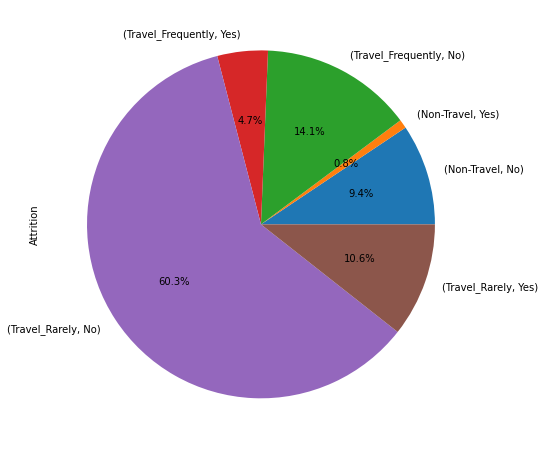

In [27]:
plt.figure(figsize = (8,8))
business_travel.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations:
    
Employee who travel_rarely are going to attrition more as per rest employess from dataset information.

And Who non travel having attrition ratio 0.8 percent only.

#### 

# Department

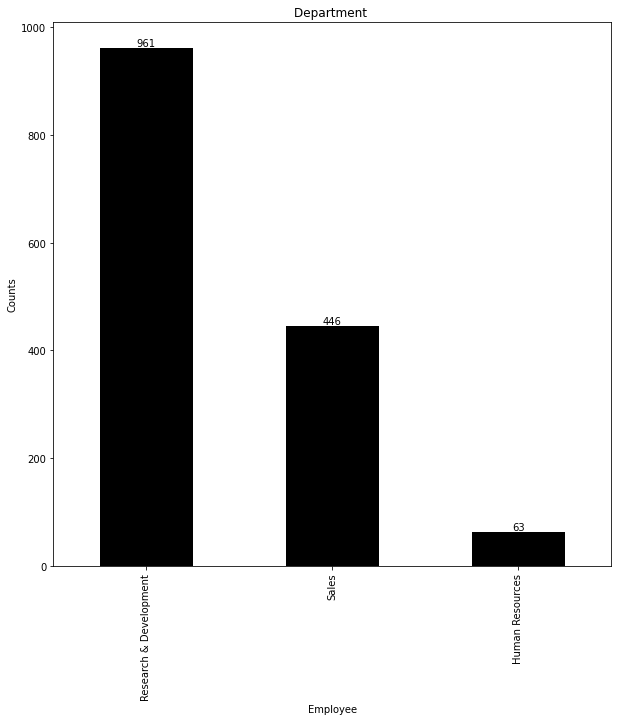

In [28]:
department = df.Department.value_counts()
plt.figure(figsize = (10,10))
df_department = department.plot(kind = 'bar', color = 'k')
df_department.set_title('Department ')
df_department.set_xlabel('Employee')
df_department.set_ylabel('Counts')


for i in df_department.containers:
    df_department.bar_label(i)

#### Observations

In [29]:
# Department              No of employees
# Research & Development    961

# Sales                     446

# Human Resources            63

## Percentage of the various Department Employee

<AxesSubplot:ylabel='Department'>

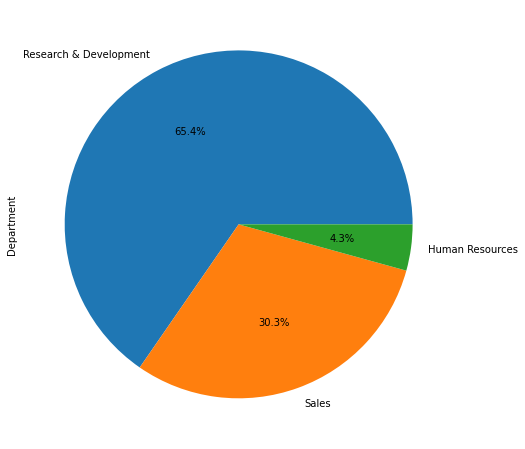

In [30]:
plt.figure(figsize = (8,8))
department.plot(kind = 'pie', autopct = '%1.1f%%')

#### From above graph we find that 65.4 percent of the employees are of Research & Development and 30.3 percent of employees are of sales, rest 4.3 percent employee are HR.

## Employee Department with respect to Attrition

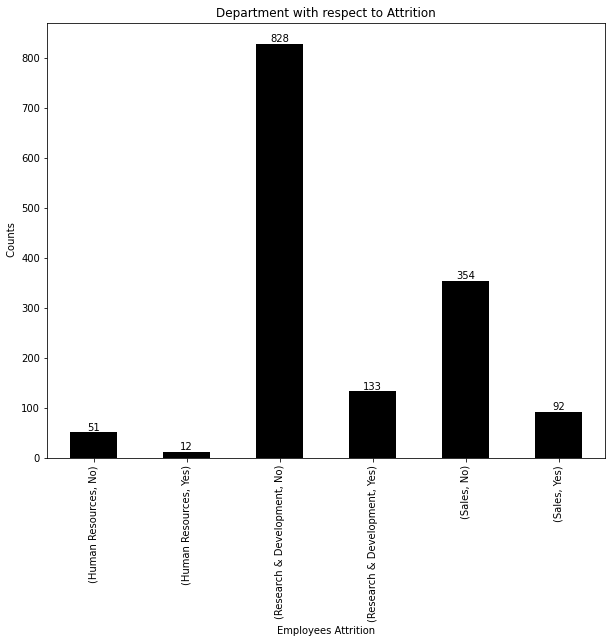

In [31]:
department_emp = df.groupby('Department')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_department_emp = department_emp.plot(kind = 'bar', color = 'k')
df_department_emp.set_title("Department with respect to Attrition")
df_department_emp.set_xlabel("Employees Attrition")
df_department_emp.set_ylabel(" Counts")

for i in df_department_emp.containers:
    df_department_emp.bar_label(i)

### Observations

In [32]:
# Department              Attrition   Employee Counts
# Human Resources         No            51
#                         Yes           12
    
# Research & Development  No           828
#                         Yes          133
    
# Sales                   No           354
#                         Yes           92

### Percentage

<AxesSubplot:ylabel='Attrition'>

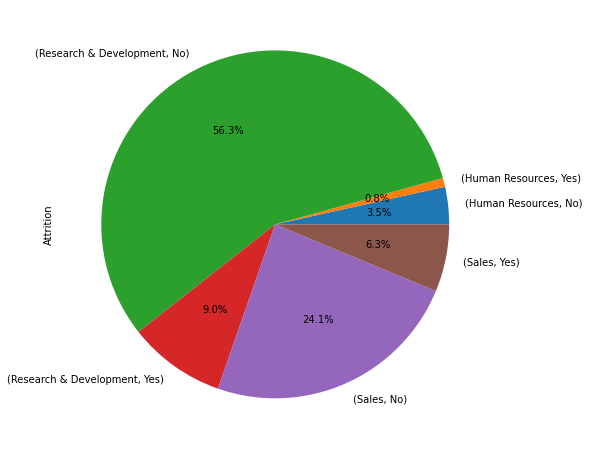

In [33]:
plt.figure(figsize = (8,8))
department_emp.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations:
Employee department Research & Development are going to attrition more as per rest employess from dataset information.

And Human Resources employee attrition ratio 0.8 percent only, which are smallest attrition department from the dataset

#### 

# EducationField of the Employees

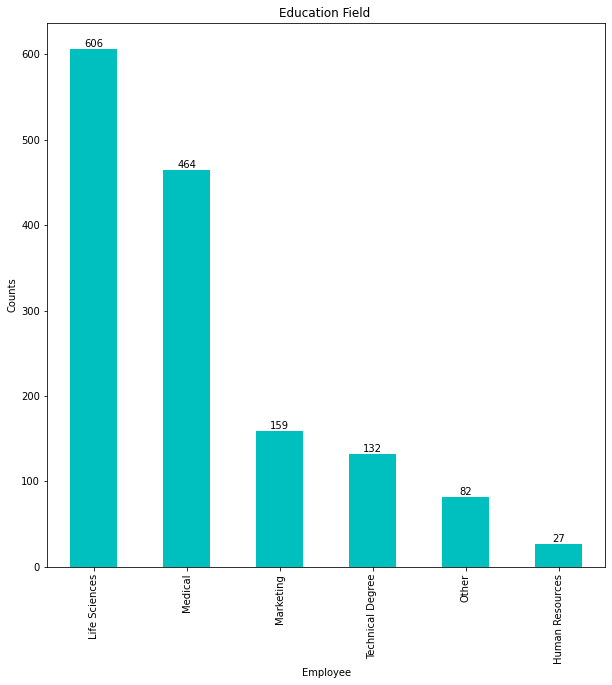

In [34]:
EducationField = df.EducationField.value_counts()
plt.figure(figsize = (10,10))
df_EducationField = EducationField.plot(kind = 'bar', color = 'c')
df_EducationField.set_title('Education Field ')
df_EducationField.set_xlabel('Employee')
df_EducationField.set_ylabel('Counts')


for i in df_EducationField.containers:
    df_EducationField.bar_label(i)

### Observations

In [35]:
# Education Field   Employee Counts
# Life Sciences       606

# Medical             464

# Marketing           159

# Technical Degree    132

# Other                82

# Human Resources      27

# Life Sciences employees are higher then rest education field department 

### Percentage of EducationField 

<AxesSubplot:ylabel='EducationField'>

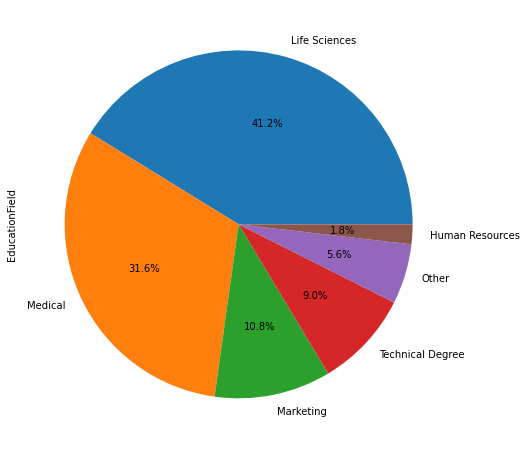

In [36]:
plt.figure(figsize = (8,8))
EducationField.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations:

42.2 ratio of the employees are of life science education field, 31.6 employee are of medical education field and rest education field employees are in a small portions.

# Employee EducationField with respect to Attrition

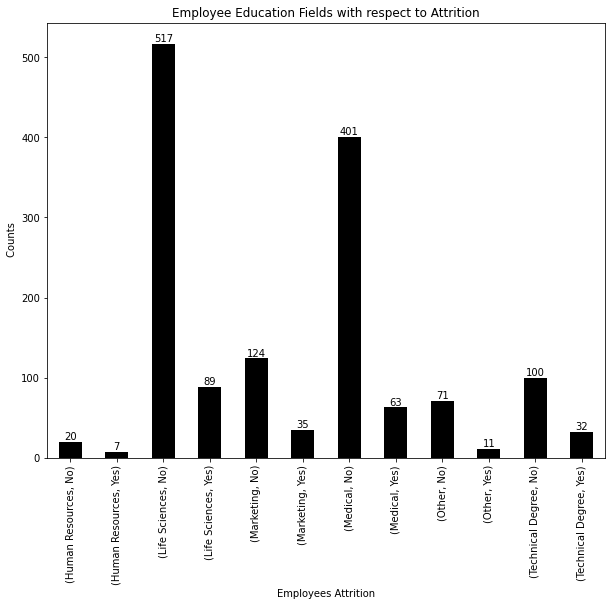

In [37]:
education_emp = df.groupby('EducationField')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_education_emp = education_emp.plot(kind = 'bar', color = 'k')
df_education_emp.set_title("Employee Education Fields with respect to Attrition")
df_education_emp.set_xlabel("Employees Attrition")
df_education_emp.set_ylabel(" Counts")

for i in df_education_emp.containers:
    df_education_emp.bar_label(i)

### Observations

In [38]:
# EducationField   Attrition  Employee Counts
# Human Resources   No            20
#                   Yes            7
    
# Life Sciences     No           517
#                   Yes           89
    
# Marketing         No           124
#                   Yes           35
    
# Medical           No           401
#                   Yes           63
    
# Other             No            71
#                   Yes           11
    
# Technical Degree  No           100
#                   Yes           32

## Percentage of EducationField with respect to Attrition

<AxesSubplot:ylabel='Attrition'>

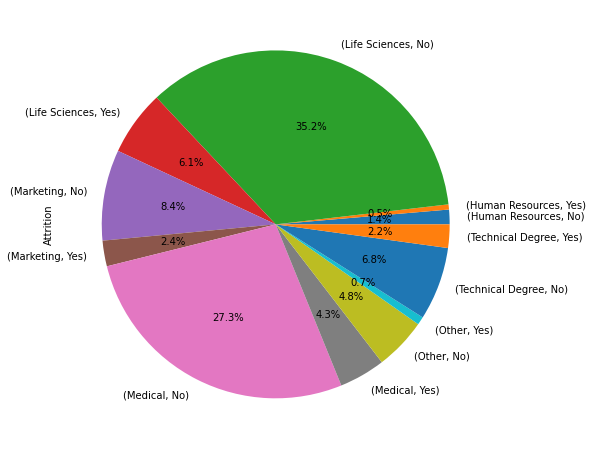

In [39]:
plt.figure(figsize = (8,8))
education_emp.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations:
Employee having education field Life science are going to attrition more as per rest employess from dataset information.

And Human Resources employee attrition ratio 0.5 percent only, which are smallest attrition department from the dataset

#### 

# Gender of the Employees

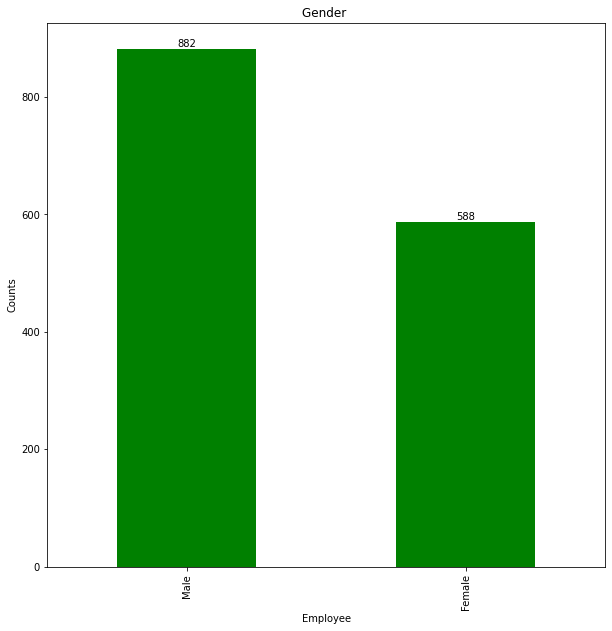

In [40]:
Gender = df.Gender.value_counts()
plt.figure(figsize = (10,10))
df_Gender = Gender.plot(kind = 'bar', color = 'g')
df_Gender.set_title('Gender ')
df_Gender.set_xlabel('Employee')
df_Gender.set_ylabel('Counts')


for i in df_Gender.containers:
    df_Gender.bar_label(i)

### Observations:  Male and female counts of the employee are as follows

In [41]:
# Employee  Counts
# Male      882

# Female    588

### Percentage of Gender 

<AxesSubplot:ylabel='Gender'>

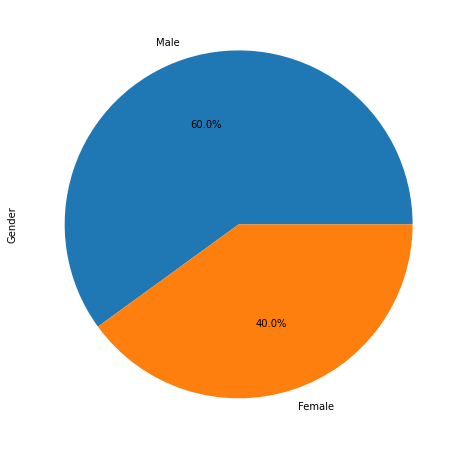

In [42]:
plt.figure(figsize = (8,8))
Gender.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations: 60 percent of the employees are male rest 40 percent are female employees

#### 

# Gender of the Employee with respect to Attrition

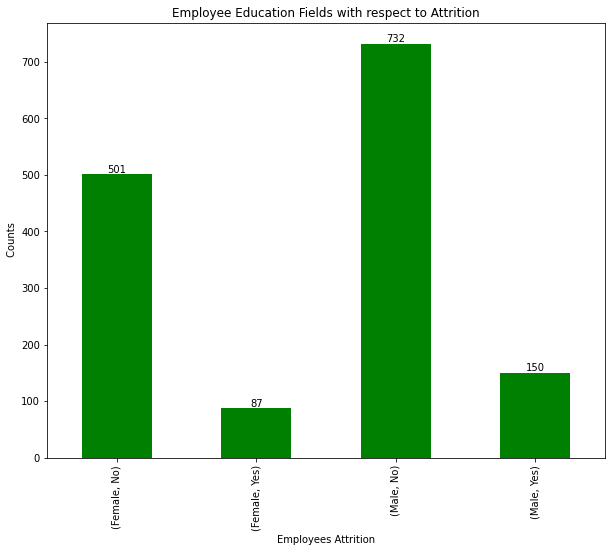

In [43]:
gender_emp = df.groupby('Gender')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_gender_emp = gender_emp.plot(kind = 'bar', color = 'g')
df_gender_emp.set_title("Employee Education Fields with respect to Attrition")
df_gender_emp.set_xlabel("Employees Attrition")
df_gender_emp.set_ylabel(" Counts")

for i in df_gender_emp.containers:
    df_gender_emp.bar_label(i)

### Observations

In [44]:
# Gender  Attrition  Employee Counts
# Female  No           501 
#         Yes           87
    
# Male    No           732
#         Yes          150

# Gender Percentage of the Employee with respect to Attrition

<AxesSubplot:ylabel='Attrition'>

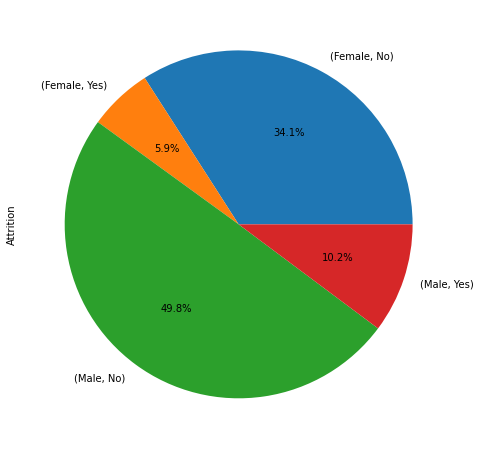

In [45]:
plt.figure(figsize = (8,8))
gender_emp.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations: 10.2 percent of the male employees attrition out of 60 percent. Only 5.9 percent female attrition out of 40 percent.

#### 

# JobRole

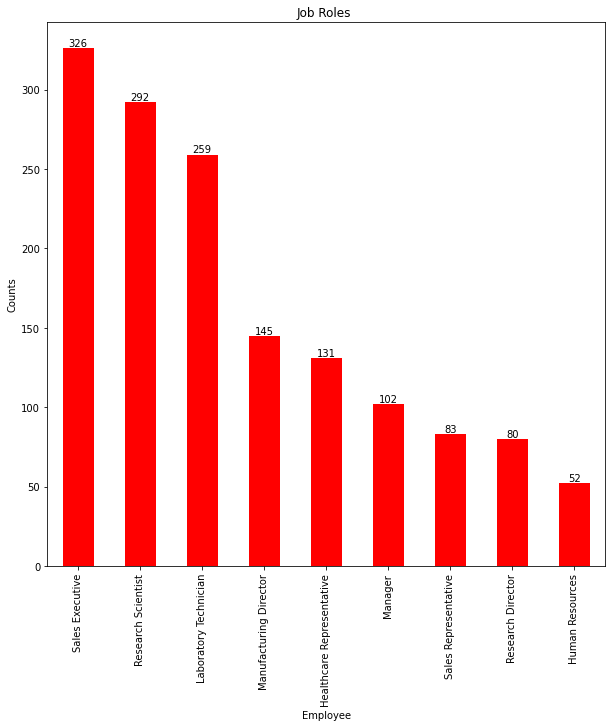

In [46]:
JobRole = df.JobRole.value_counts()
plt.figure(figsize = (10,10))
df_JobRole = JobRole.plot(kind = 'bar', color = 'r')
df_JobRole.set_title('Job Roles ')
df_JobRole.set_xlabel('Employee')
df_JobRole.set_ylabel('Counts')


for i in df_JobRole.containers:
    df_JobRole.bar_label(i)

### Observations

In [47]:
# Job Roles              Employee Counts
# Sales Executive              326

# Research Scientist           292

# Laboratory Technician        259

# Manufacturing Director       145

# Healthcare Representative    131

# Manager                      102

# Sales Representative          83

# Research Director             80

# Human Resources               52

# Percentage of Job Role

<AxesSubplot:ylabel='JobRole'>

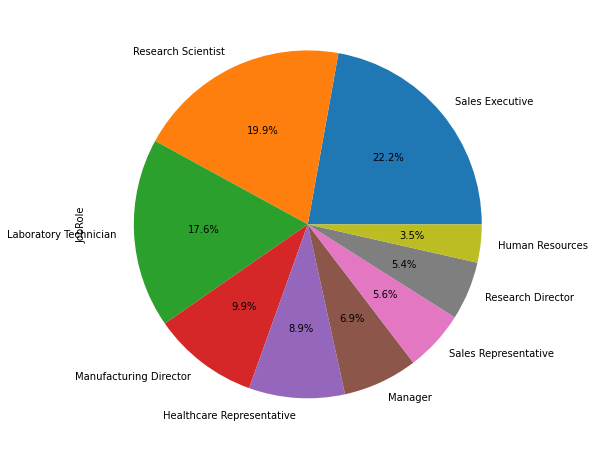

In [48]:
plt.figure(figsize = (8,8))
JobRole.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations: Highest job roles are of sales executive and a small portion of 3.5 ratio are of HR.

# Job Roles of the Employee with respect to Attrition

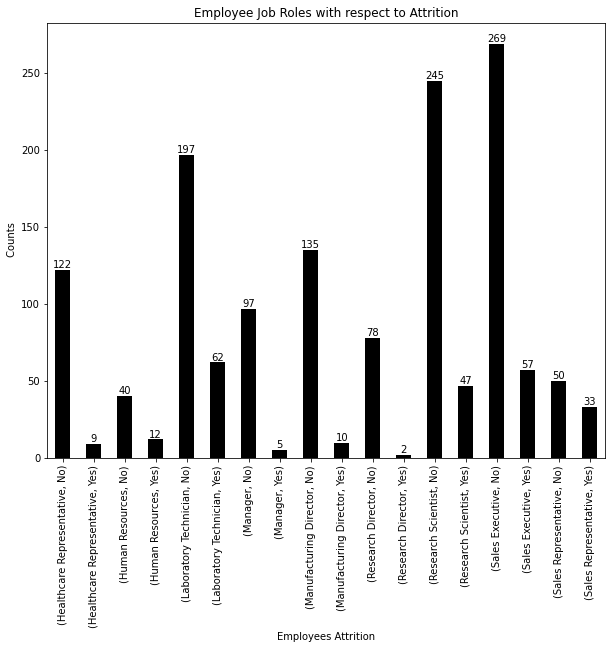

In [49]:
jobrole_emp = df.groupby('JobRole')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_jobrole_emp = jobrole_emp.plot(kind = 'bar', color = 'k')
df_jobrole_emp.set_title("Employee Job Roles with respect to Attrition")
df_jobrole_emp.set_xlabel("Employees Attrition")
df_jobrole_emp.set_ylabel(" Counts")

for i in df_jobrole_emp.containers:
    df_jobrole_emp.bar_label(i)

### Observations:

In [50]:
# JobRole                    Attrition  Employee counts
# Healthcare Representative  No           122
#                            Yes            9
    
# Human Resources            No            40
#                            Yes           12
    
# Laboratory Technician      No           197
#                            Yes           62
    
# Manager                    No            97
#                            Yes            5
    
# Manufacturing Director     No           135
#                            Yes           10
    
# Research Director          No            78
#                            Yes            2
    
# Research Scientist         No           245
#                            Yes           47
    
# Sales Executive            No           269
#                            Yes           57
    
# Sales Representative       No            50
#                            Yes           33

# Job Role Percentage of the Employee with respect to Attrition

<AxesSubplot:ylabel='Attrition'>

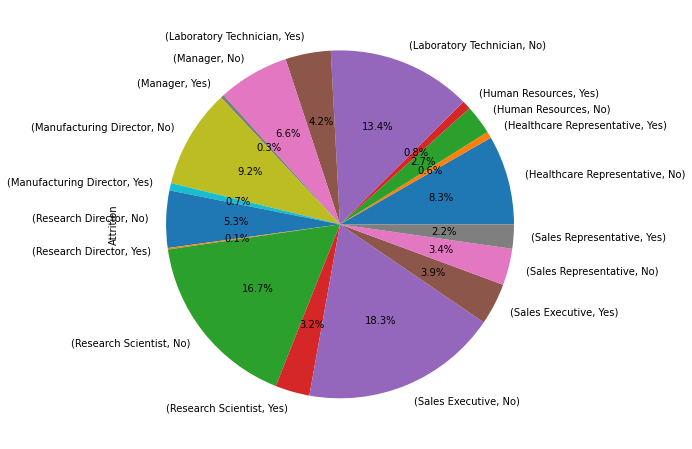

In [51]:
plt.figure(figsize = (8,8))
jobrole_emp.plot(kind = 'pie', autopct = '%1.1f%%')

#### 

# MaritalStatus of the Employee

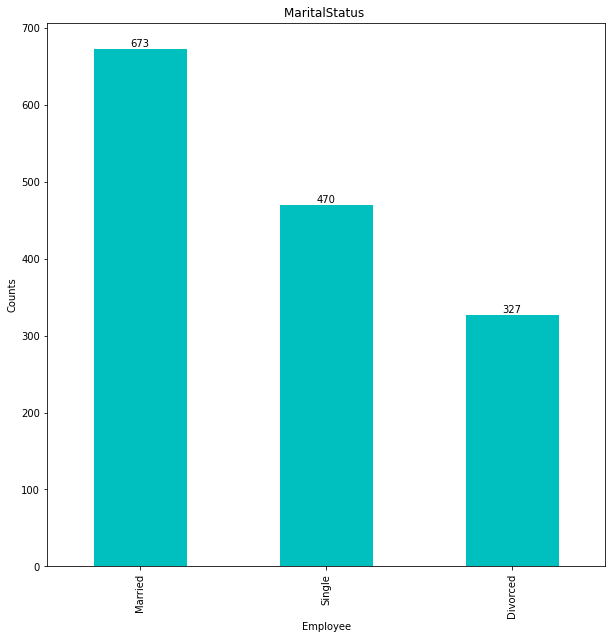

In [52]:
MaritalStatus = df.MaritalStatus.value_counts()
plt.figure(figsize = (10,10))
df_MaritalStatus = MaritalStatus.plot(kind = 'bar', color = 'c')
df_MaritalStatus.set_title('MaritalStatus ')
df_MaritalStatus.set_xlabel('Employee')
df_MaritalStatus.set_ylabel('Counts')


for i in df_MaritalStatus.containers:
    df_MaritalStatus.bar_label(i)

### Observatons

In [53]:
# Marital Status  Employee_counts
# Married             673

# Single              470

# Divorced            327

### Percentage of Marital Status Employees

<AxesSubplot:ylabel='MaritalStatus'>

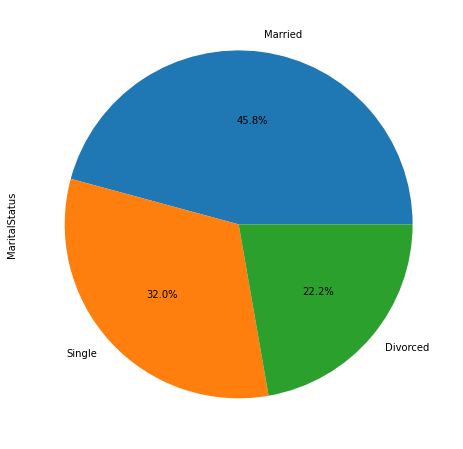

In [54]:
plt.figure(figsize = (8,8))
MaritalStatus.plot(kind = 'pie', autopct = '%1.1f%%')

#### Observations: 45.8 percent of the employee are married, 32 percent are single rest 22.2 are divorced in the dataset

# Marital Status of the Employee with respect to Attrition

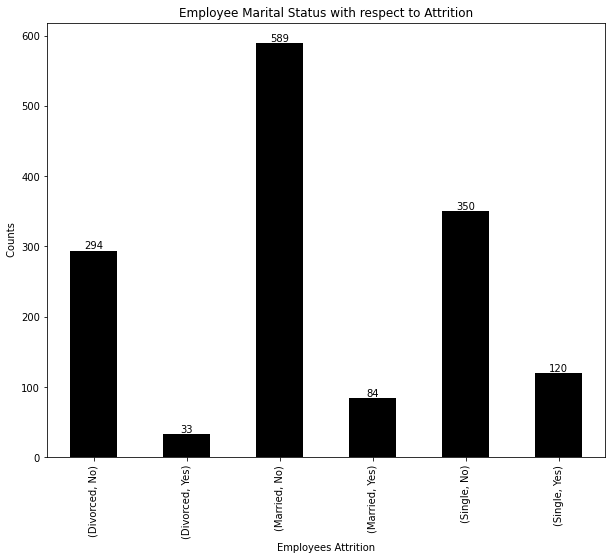

In [55]:
marital_emp = df.groupby('MaritalStatus')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_marital_emp = marital_emp.plot(kind = 'bar', color = 'k')
df_marital_emp.set_title("Employee Marital Status with respect to Attrition")
df_marital_emp.set_xlabel("Employees Attrition")
df_marital_emp.set_ylabel(" Counts")

for i in df_marital_emp.containers:
    df_marital_emp.bar_label(i)

### Observations

In [56]:
# MaritalStatus  Attrition  Emp Counts
# Divorced       No           294
#                Yes           33
    
# Married        No           589
#                Yes           84
    
# Single         No           350
#                Yes          120

# Percentage of Marital Status Employee with respect to Attrition

<AxesSubplot:ylabel='Attrition'>

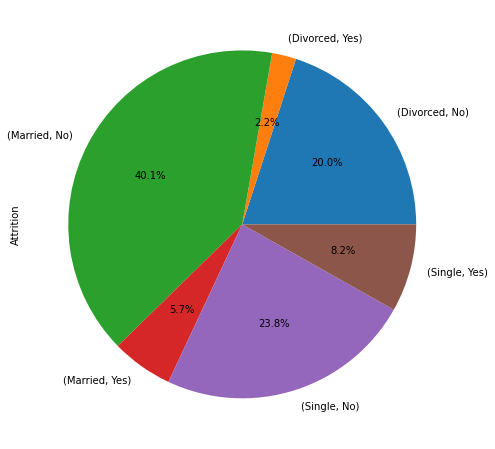

In [57]:
plt.figure(figsize = (8,8))
marital_emp.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations: 5.7 percentage of married employee attrition and 2.2 percentage are the lowest attrition done by divorced employees.

#### 

# Over18 Employee

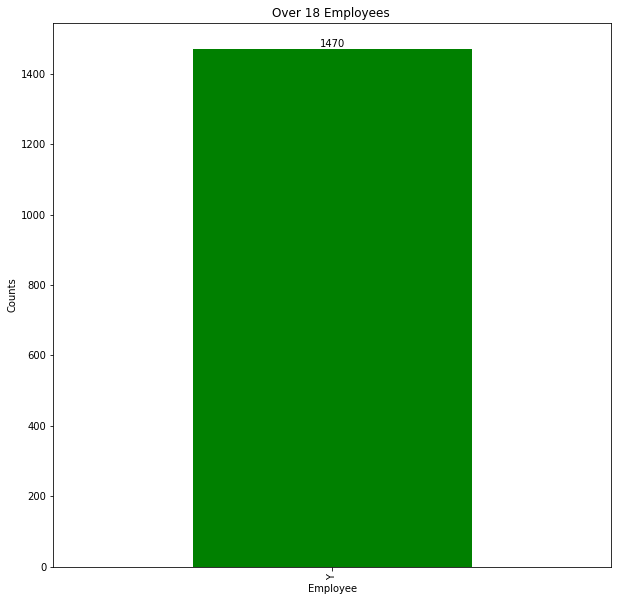

In [58]:
Over18 = df.Over18.value_counts()
plt.figure(figsize = (10,10))
df_Over18 = Over18.plot(kind = 'bar', color = 'g')
df_Over18.set_title('Over 18 Employees ')
df_Over18.set_xlabel('Employee')
df_Over18.set_ylabel('Counts')


for i in df_Over18.containers:
    df_Over18.bar_label(i)

### Observations : We know that working in a company employee should be 18 or 18 above hence graph shows all employee are 18+. This dataset is not much neccessary hence we can drop it for best performance model.

# Working Over Time Employees

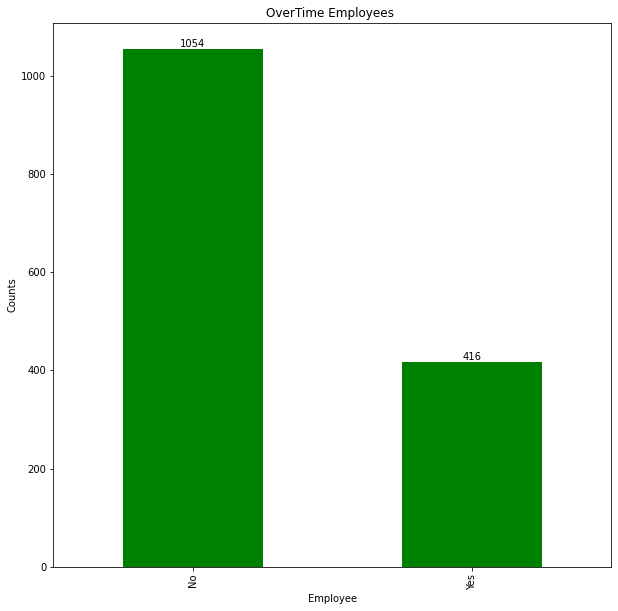

In [59]:
OverTime = df.OverTime.value_counts()
plt.figure(figsize = (10,10))
df_OverTime = OverTime.plot(kind = 'bar', color = 'g')
df_OverTime.set_title('OverTime Employees ')
df_OverTime.set_xlabel('Employee')
df_OverTime.set_ylabel('Counts')


for i in df_OverTime.containers:
    df_OverTime.bar_label(i)

### Observations : Only 416 employees are doing overtime rest are working as per schedule.

### Percentage of Overtime Doing Employee

<AxesSubplot:ylabel='OverTime'>

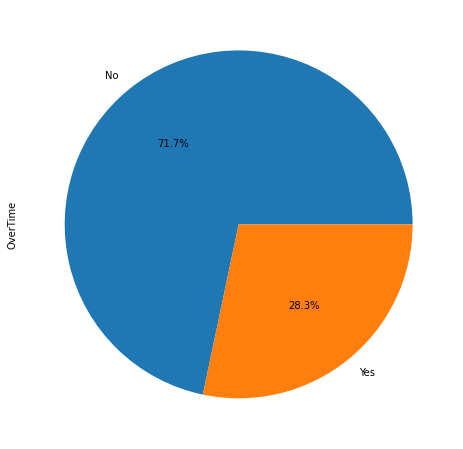

In [60]:
plt.figure(figsize = (8,8))
OverTime.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations : Only 28.3 ratio of employees are doing overtime rest are working as per schedule.

# Effect of Overtime on Attrition

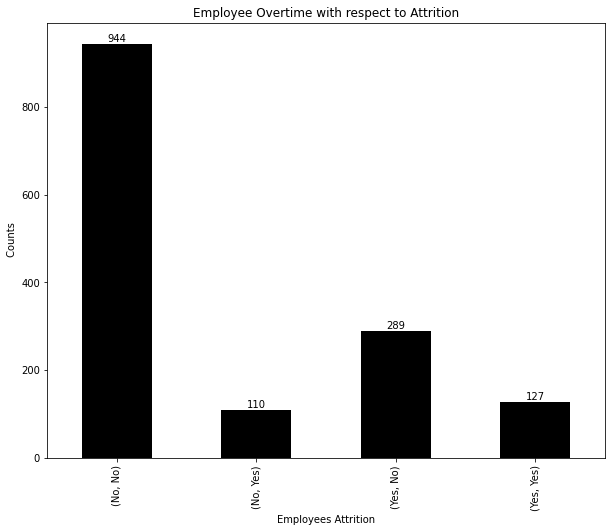

In [61]:
OverTime_emp = df.groupby('OverTime')['Attrition'].value_counts()
plt.figure(figsize = (10,8))
df_OverTime_emp = OverTime_emp.plot(kind = 'bar', color = 'k')
df_OverTime_emp.set_title("Employee Overtime with respect to Attrition")
df_OverTime_emp.set_xlabel("Employees Attrition")
df_OverTime_emp.set_ylabel(" Counts")

for i in df_OverTime_emp.containers:
    df_OverTime_emp.bar_label(i)

### Observations

In [62]:
# OverTime  Attrition  Employee Counts
# No        No           944
#           Yes          110
    
# Yes       No           289
#           Yes          127

# 127 employees attriton because of overtime

# Percentage of Overtime with respect to Attrition

<AxesSubplot:ylabel='Attrition'>

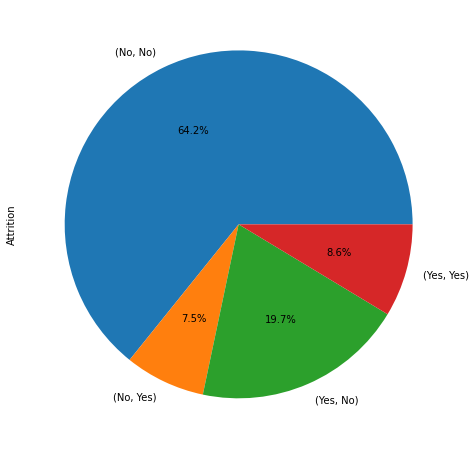

In [63]:
plt.figure(figsize = (8,8))
OverTime_emp.plot(kind = 'pie', autopct = '%1.1f%%')

### Observations: 8.6 Ratio of employee attrition cause of overtime rest 60.2 are not attrition because of normal work schedule.

# Checking Integer Columns

## Unique Values of Integer columns

In [64]:
for i in df_integer:
    print(i,'\n' ,df[i].unique().shape) # checking unique values shape

Age 
 (43,)
DailyRate 
 (886,)
DistanceFromHome 
 (29,)
Education 
 (5,)
EmployeeCount 
 (1,)
EmployeeNumber 
 (1470,)
EnvironmentSatisfaction 
 (4,)
HourlyRate 
 (71,)
JobInvolvement 
 (4,)
JobLevel 
 (5,)
JobSatisfaction 
 (4,)
MonthlyIncome 
 (1349,)
MonthlyRate 
 (1427,)
NumCompaniesWorked 
 (10,)
PercentSalaryHike 
 (15,)
PerformanceRating 
 (2,)
RelationshipSatisfaction 
 (4,)
StandardHours 
 (1,)
StockOptionLevel 
 (4,)
TotalWorkingYears 
 (40,)
TrainingTimesLastYear 
 (7,)
WorkLifeBalance 
 (4,)
YearsAtCompany 
 (37,)
YearsInCurrentRole 
 (19,)
YearsSinceLastPromotion 
 (16,)
YearsWithCurrManager 
 (18,)


## From above information we divided integer column in two parts less unique values and higher unique values so that we can understand dataset and visualize easily

## From above code we find that number of less unique values present in the dataset.

In [65]:
df_categorical = df[['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PerformanceRating', 
'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']]

In [66]:
df_categorical.head(5)

Education  EmployeeCount  EnvironmentSatisfaction  JobInvolvement  \
0          2              1                        2               3   
1          1              1                        3               2   
2          2              1                        4               2   
3          4              1                        4               3   
4          1              1                        1               3   

   JobLevel  JobSatisfaction  NumCompaniesWorked  PerformanceRating  \
0         2                4                   8                  3   
1         2                2                   1                  4   
2         1                3                   6                  3   
3         1                3                   1                  3   
4         1                2                   9                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TrainingTimesLastYear  WorkLifeBalance  
0                      0                1  
1                      3                3  
2                      3                3  
3                      3                3  
4                      3                3

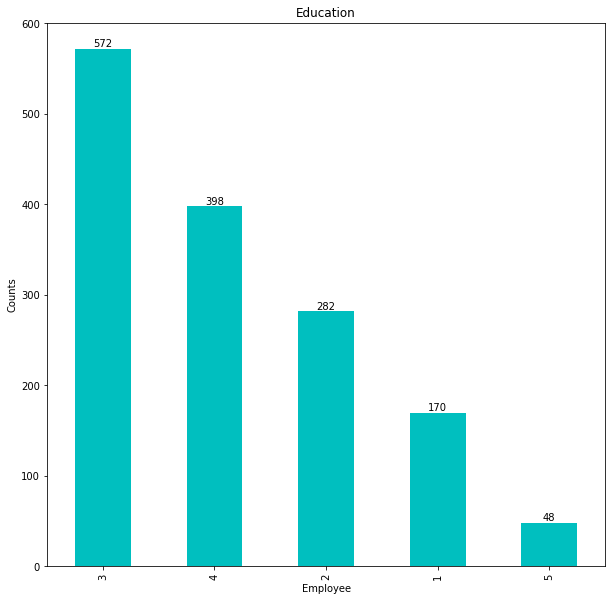

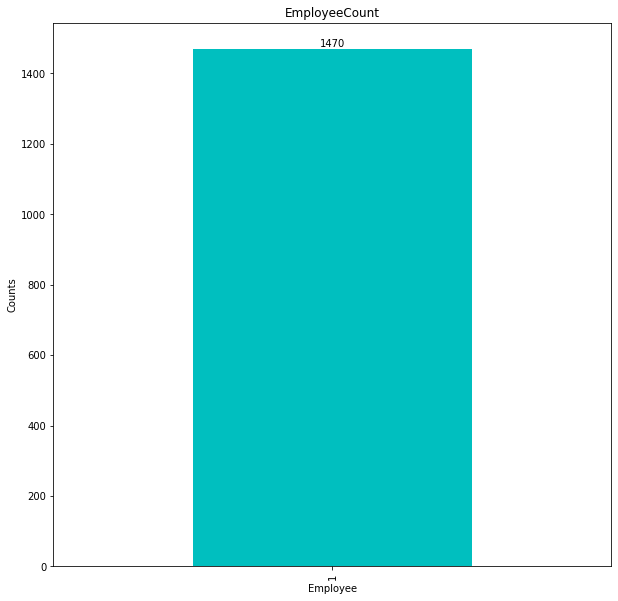

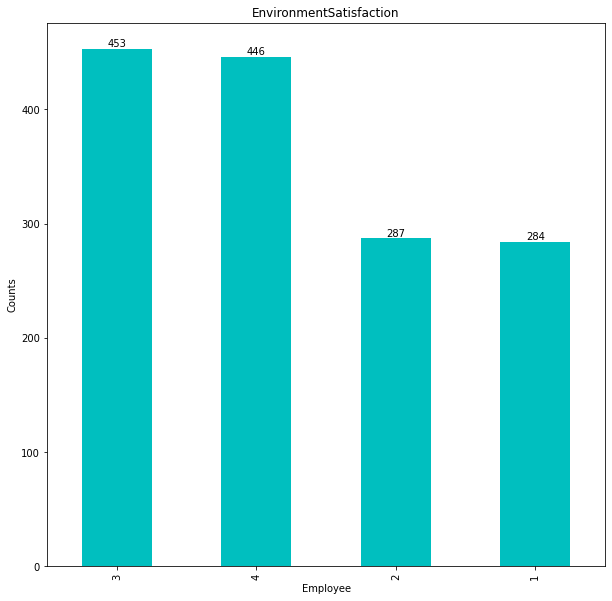

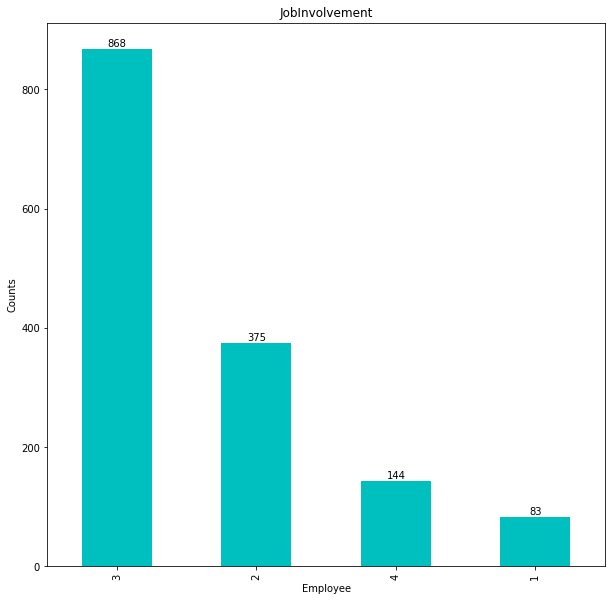

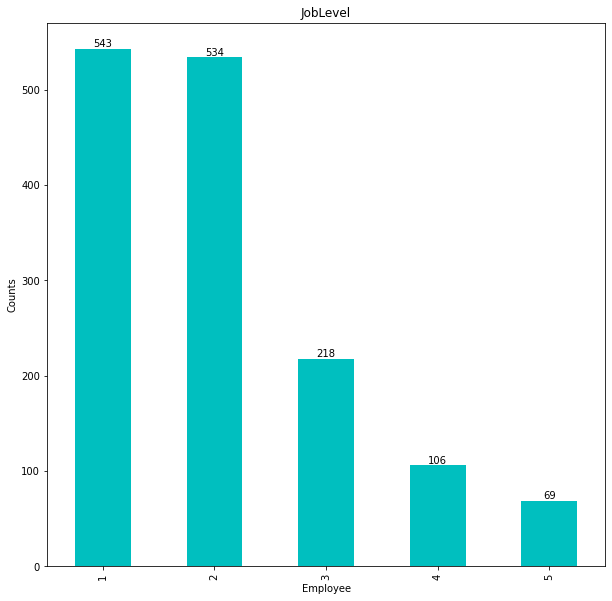

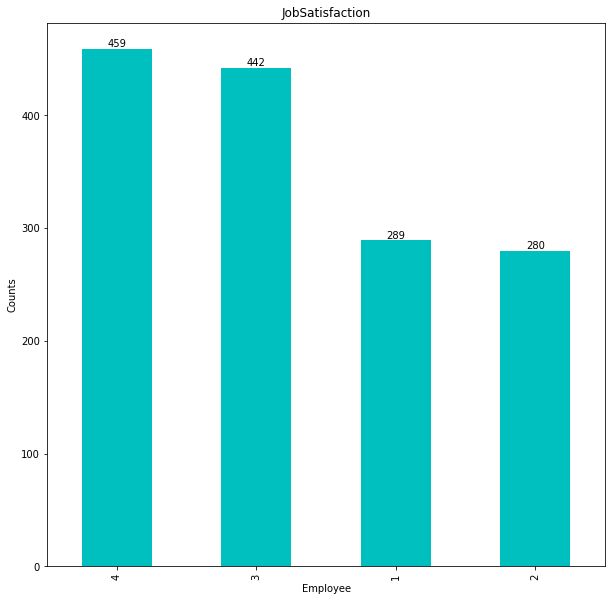

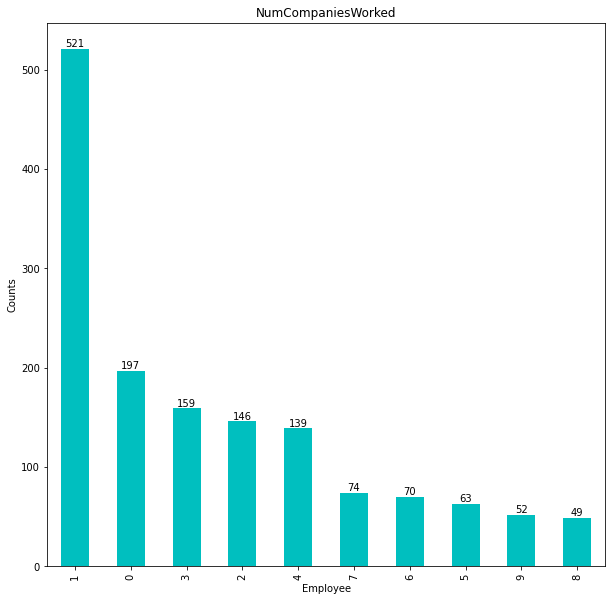

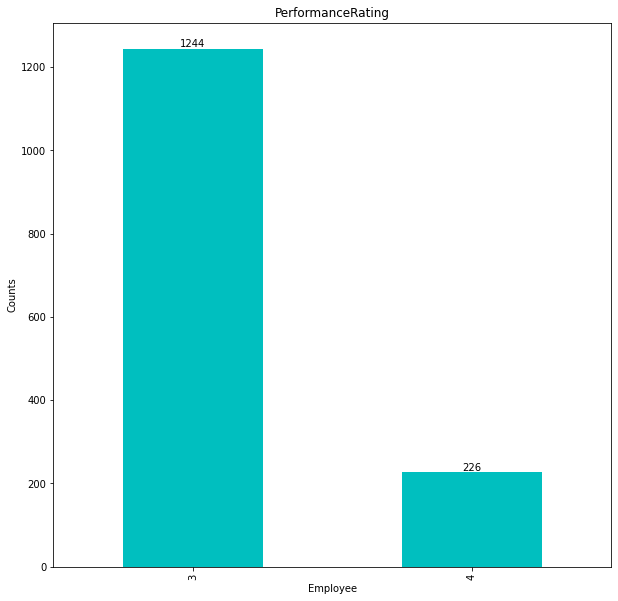

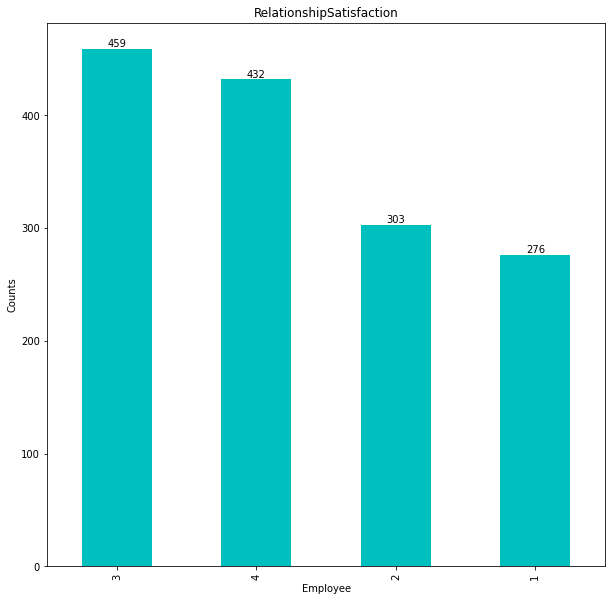

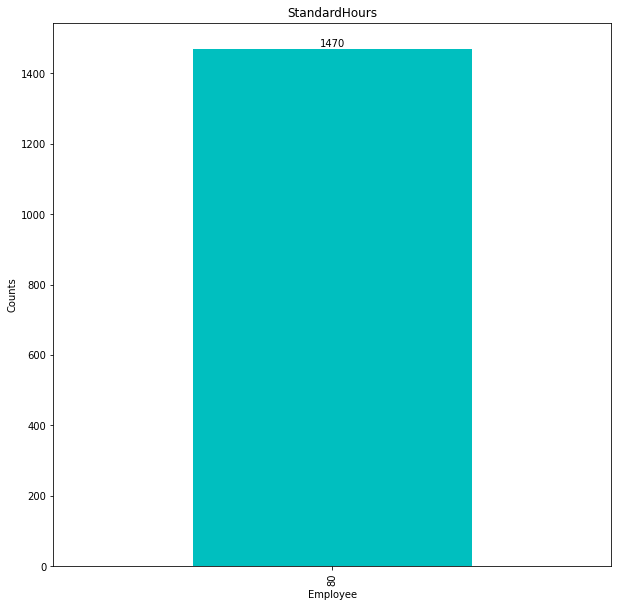

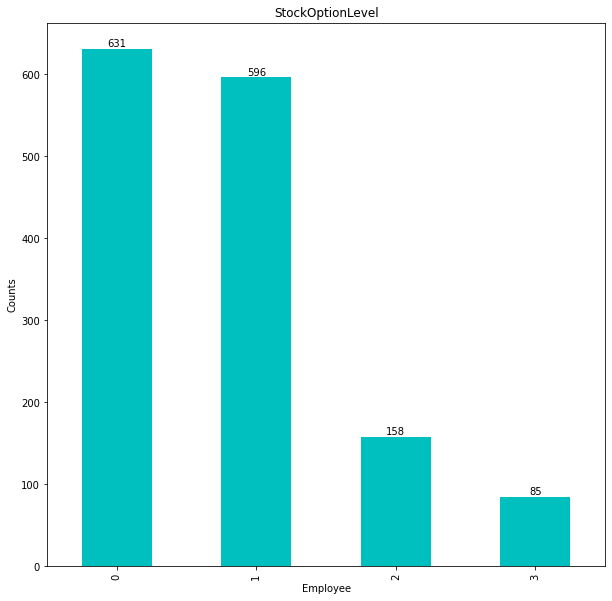

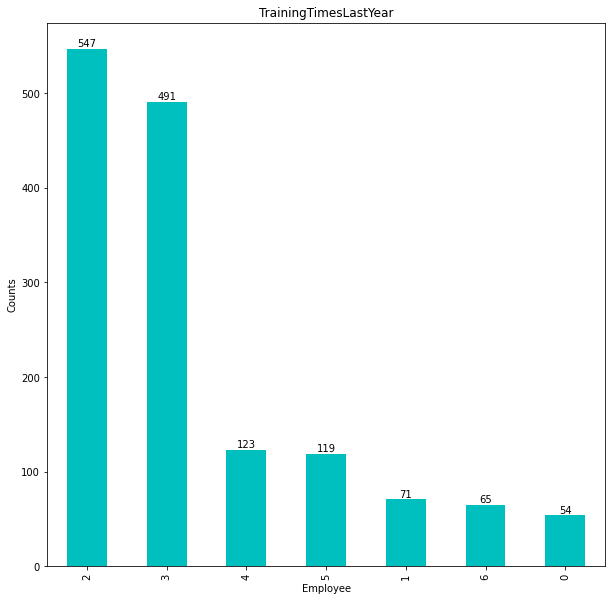

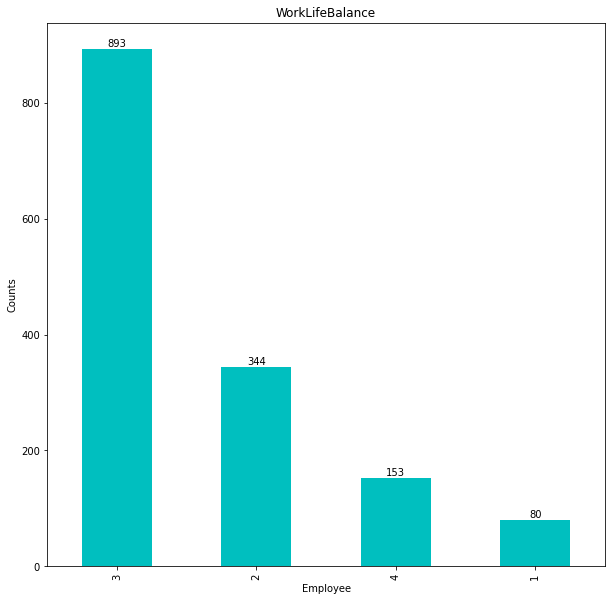

In [67]:
for i in df_categorical.columns:
    get = df[i].value_counts()
    plt.figure(figsize = (10,10))
    df_get = get.plot(kind = 'bar', color = 'c')
    df_get.set_title(i)
    df_get.set_xlabel('Employee')
    df_get.set_ylabel('Counts')


    for j in df_get.containers:
        df_get.bar_label(j)

## Observations

In [68]:
# Education                  Employee Counts                        
# 3                              572   Highest eduction level 3 
# 4                              398
# 2                              282
# 1                              170
# 5                              48


# EnvironmentSatisfaction    Employee Counts
# 3                             453   Highest statisfaction level  3
# 4                             446
# 2                             287
# 1                             284


# JobInvolvement            Employee Counts
# 3                            868   Highest job involvement level 3
# 2                            375
# 4                            144
# 1                            83


# JobLevel                 Employee Counts
# 1                           543    Highest job level 1 
# 2                           534
# 3                           218
# 4                           106
# 5                           69


# JobSatisfaction         Employee Counts
# 4                           459   Job Satisfaction level 4
# 3                           442
# 1                           289
# 2                           280

        
# NumCompaniesWorked      Employee Counts
# 1                          521  1 Year most Experiences Employee 
# 0                          197
# 3                          159
# 2                          146
# 4                          139
# 7                          74
# 6                          70
# 5                          63
# 9                          52
# 8                          49

        
# PerformanceRating       Employee Counts
# 3                         1244  3 Rating are given to most of the employee
# 4                         226


# RelationshipSatisfaction Employee Counts
# 3                         459  3 Highest relationship satisfaction
# 4                         432
# 2                         303
# 1                         276


# StandardHours         Employee Counts
# 80                       1470  total Hours by a employee


# StockOptionLevel      Employee Counts
# 0                        631  Non stock employee are the highest
# 1                        596
# 2                        158
# 3                        85


# TrainingTimesLastYear Employee Counts
# 2                        547    547 employee training in last 2 years.
# 3                        491
# 4                        123
# 5                        119
# 1                        71
# 6                        65
# 0                        54


# WorkLifeBalance     Employee Counts
# 3                      893      On rating of 1 to 4 scale work life balance having 3 highest rating
# 2                      344 
# 4                      153
# 1                      80

##### From above information we find that employee count is a just a count to represent a single employee which we already know as above information of every row provided for a single employee. Hence this column is not necessary we can drop it.

# Percentage of above Count Dataset

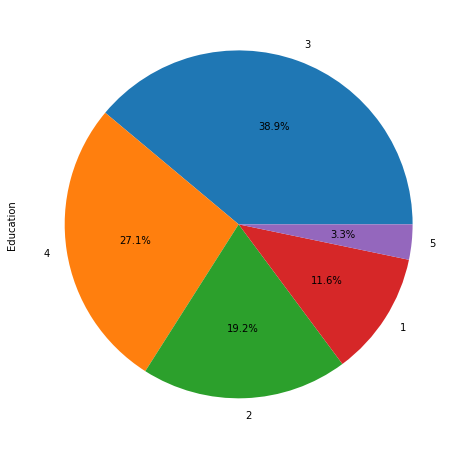

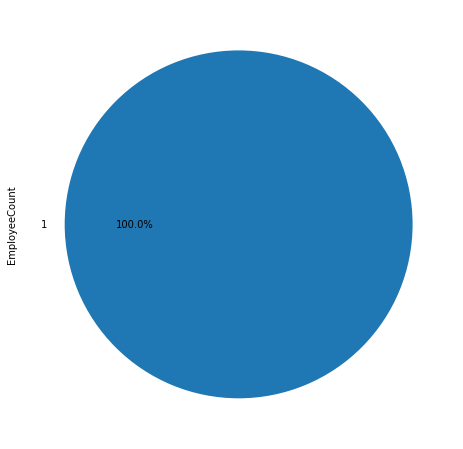

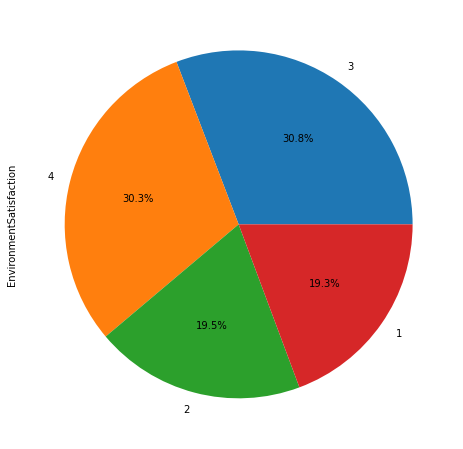

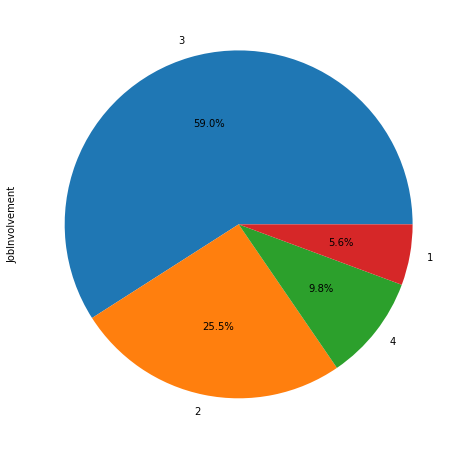

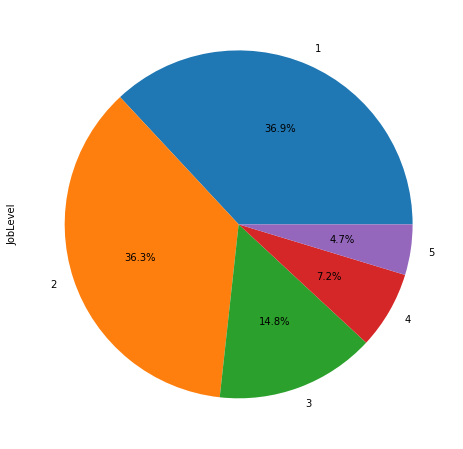

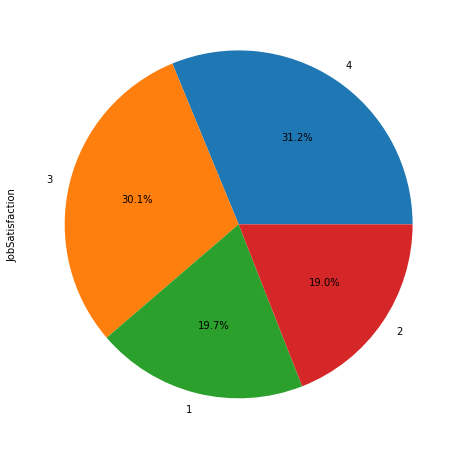

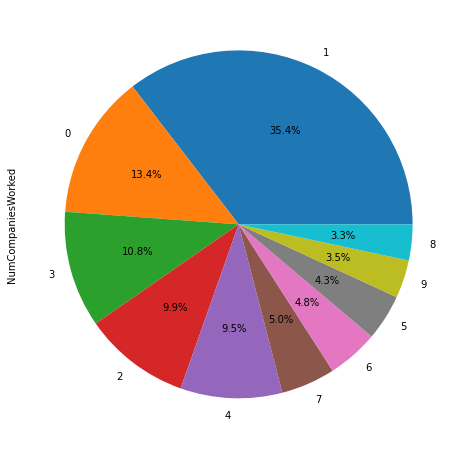

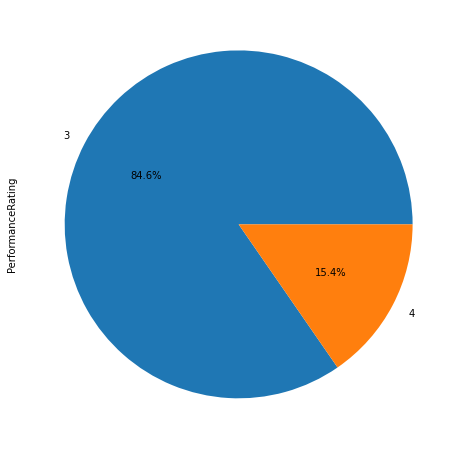

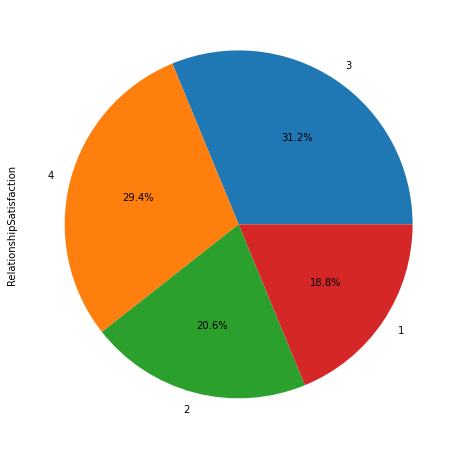

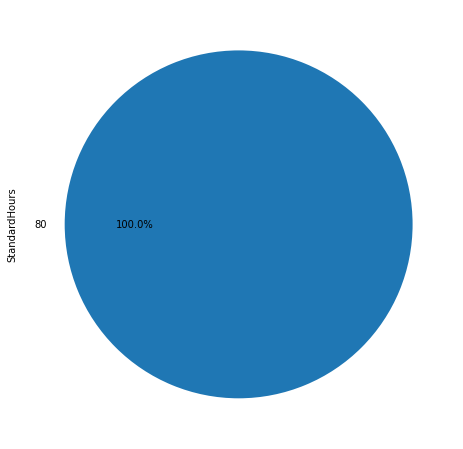

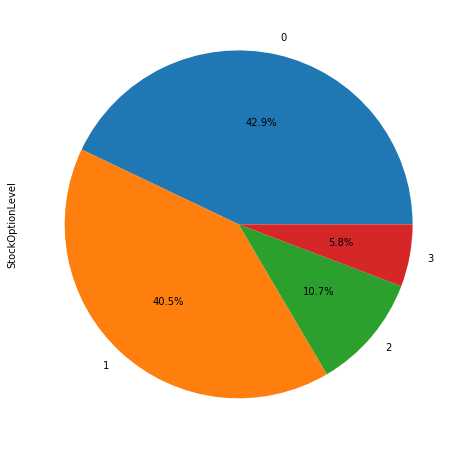

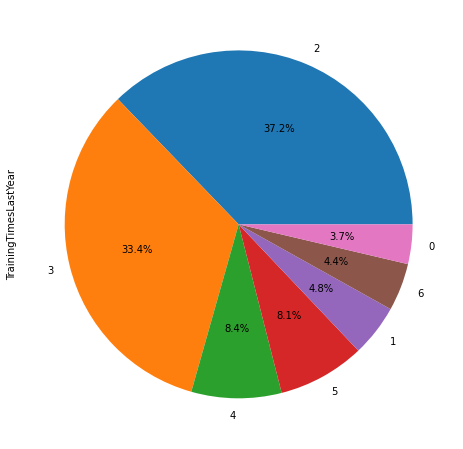

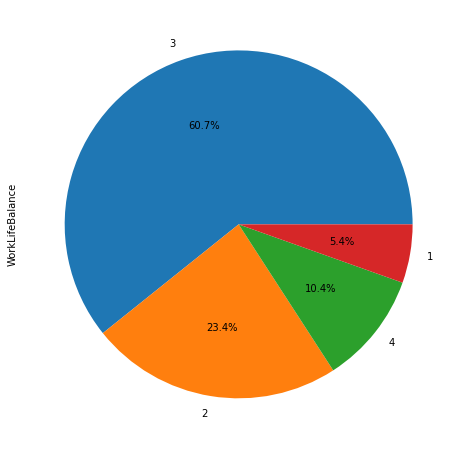

In [69]:
for i in df_categorical.columns:
    get = df[i].value_counts()
    plt.figure(figsize = (8,8))
    get.plot(kind = 'pie', autopct = '%1.1f%%')

#### Percentage observations:


1. Employee with 3 education level are more in ratio of 38.9%.

2. Environment satisfaction of employee are in range of 3 to 4 level more.

3. 59 percent employees are in the job involvent, rest are involve but in a lesser amount.

4. Job level are in range of 1 and 2 are more upto 75 percent of the employees. 

5. Job satisfaction having 3 and 4 level more.

6. 1 year experience employee are more in the firm.

7. Rating of employee are 3 level and very less colleague are in the range of 4 level.

8. Relationship satisfaction with family and friends having level range 3 to 4 with approx 60 percent of the employees having.

9. 100% percent spent 80 hours of work from the dataset information.

10. Stack option level are 0 to 1 level are more upto 84 percent.

11. Training times upto 2 to 3 range every employee get training with ratio of 70 percent since last year.

12. Most of the employees having only 3 level work life balance.


# Effects on Attrition from above Dataset

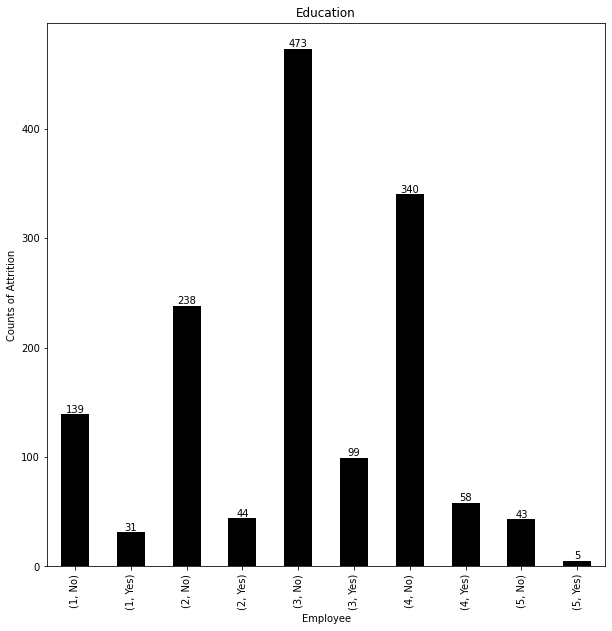

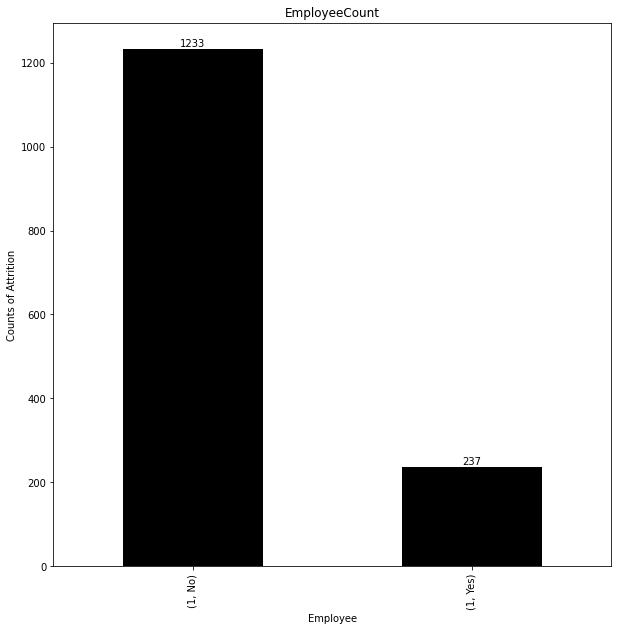

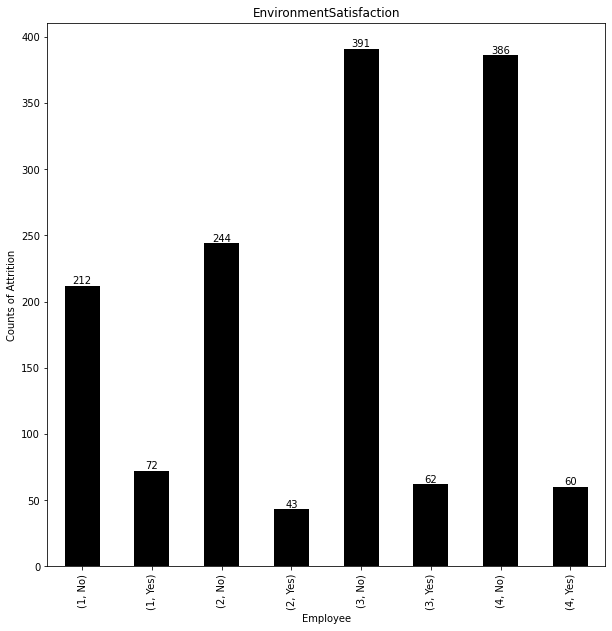

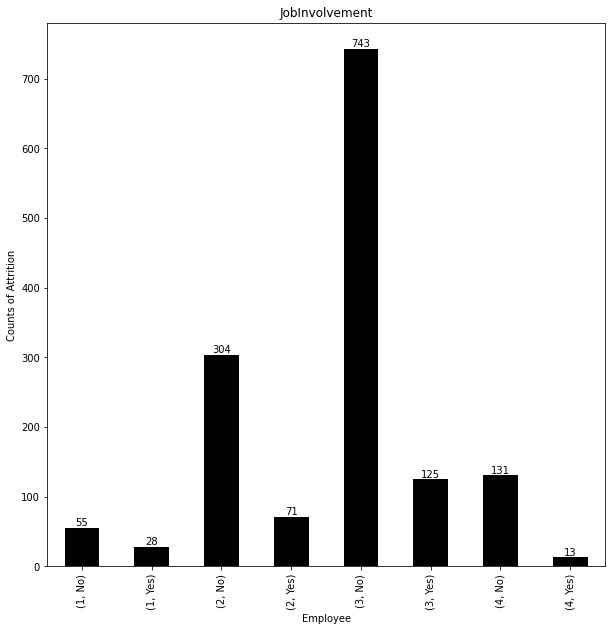

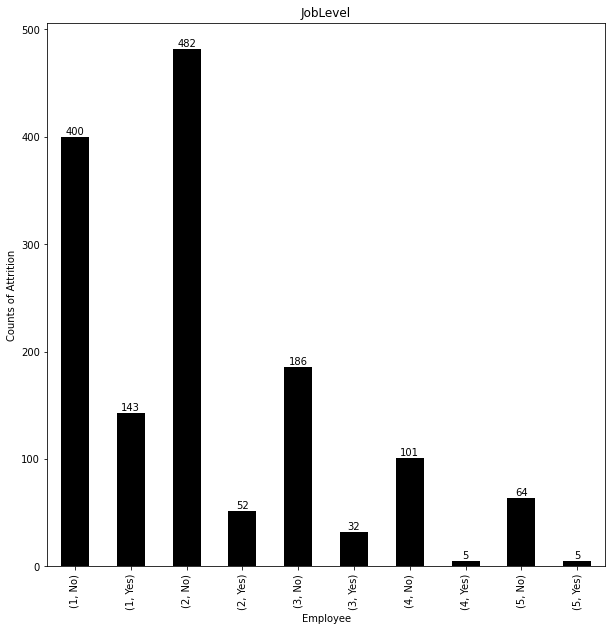

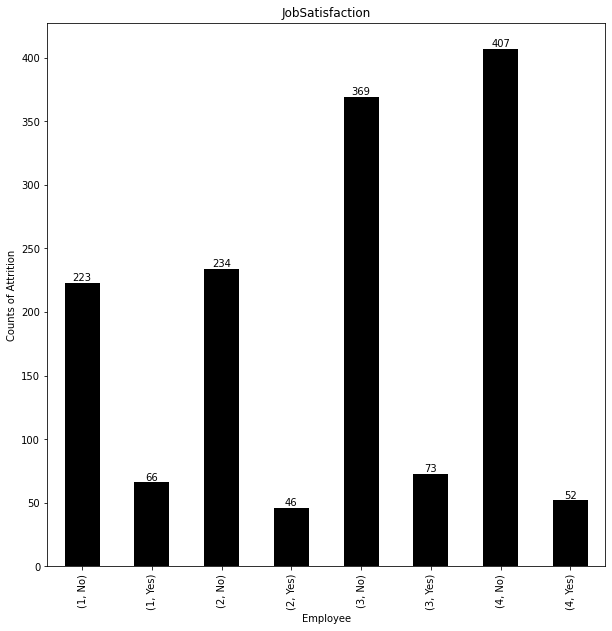

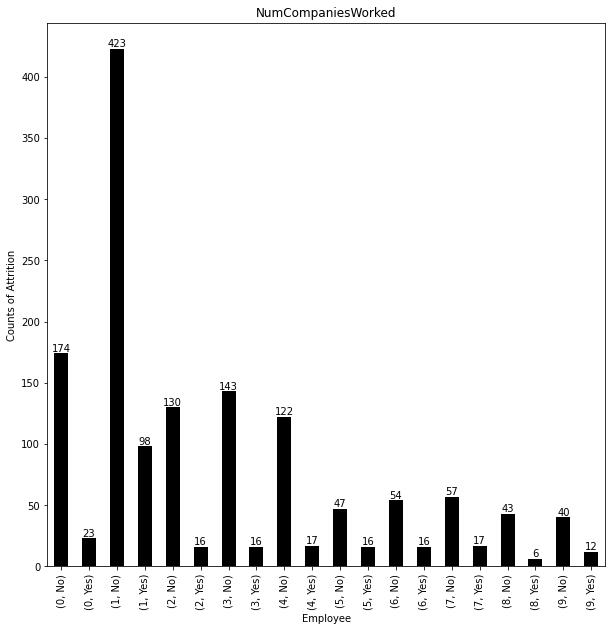

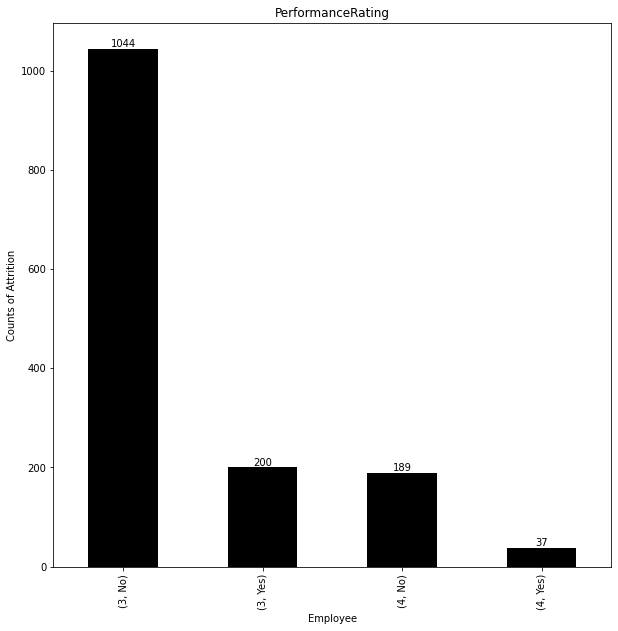

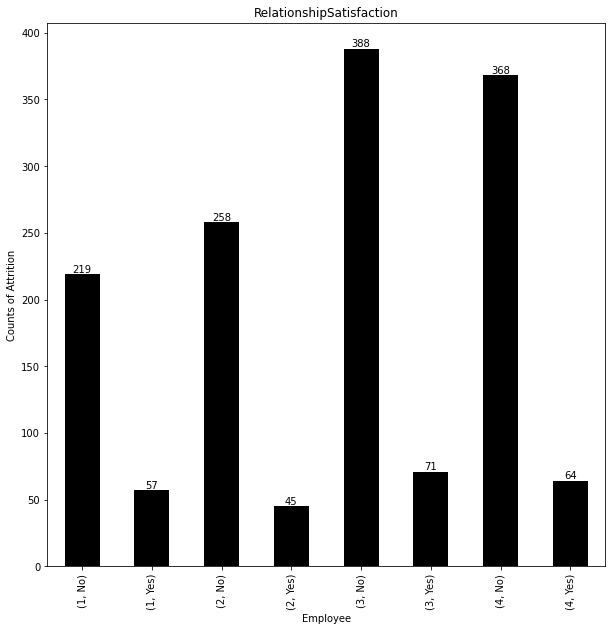

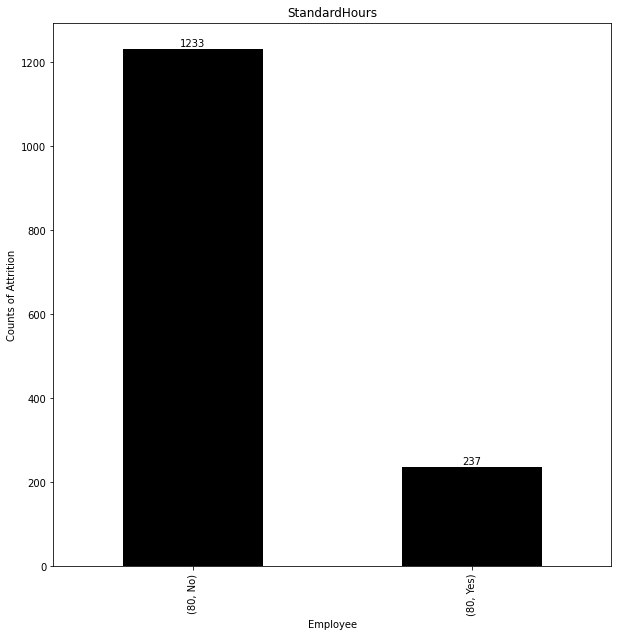

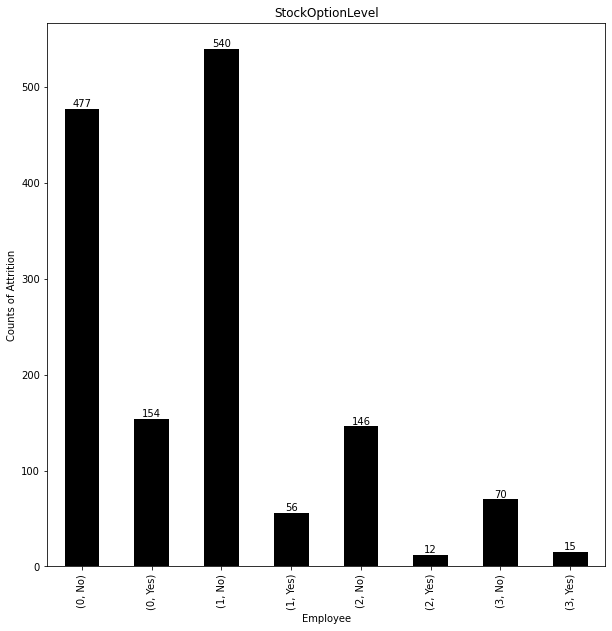

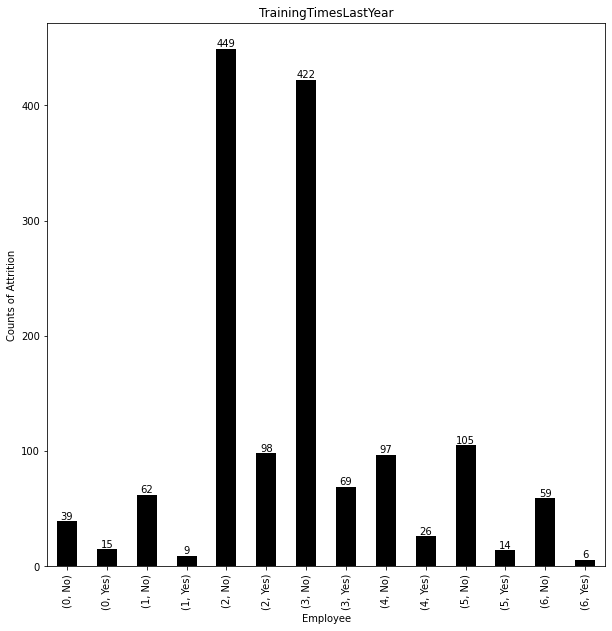

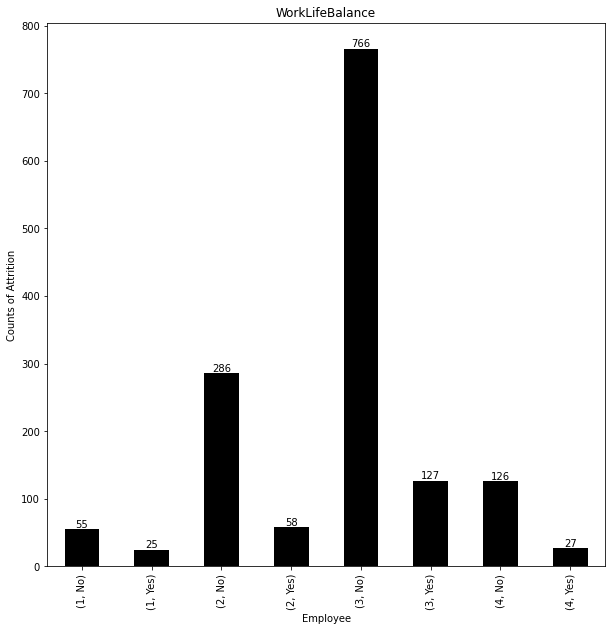

In [70]:
for i in df_categorical.columns:
    get = df.groupby(i)['Attrition'].value_counts()
    plt.figure(figsize = (10,10))
    df_get = get.plot(kind = 'bar', color = 'k')
    df_get.set_title(i)
    df_get.set_xlabel('Employee')
    df_get.set_ylabel('Counts of Attrition')


    for j in df_get.containers:
        df_get.bar_label(j)

### Observations:

In [71]:
# Education  Attrition  Emp_counts
# 1          No           139
#            Yes           31
# 2          No           238
#            Yes           44
# 3          No           473
#            Yes           99  Level 3 are attrition more
# 4          No           340
#            Yes           58 
# 5          No            43
#            Yes            5

# EmployeeCount  Attrition   Emp_counts
# 1              No           1233
#                Yes           237
    

# EnvironmentSatisfaction  Attrition  Emp_counts
# 1                        No           212
#                          Yes           72   Level 1 are attrition more
# 2                        No           244
#                          Yes           43
# 3                        No           391
#                          Yes           62
# 4                        No           386
#                          Yes           60

    
# JobInvolvement  Attrition   Emp_counts
# 1               No            55
#                 Yes           28
# 2               No           304
#                 Yes           71
# 3               No           743
#                 Yes          125   Level 3 are attrition more
# 4               No           131
#                 Yes           13

# JobLevel  Attrition  Emp_counts
# 1         No           400
#           Yes          143   Job Level 1 are attrition more
# 2         No           482
#           Yes           52
# 3         No           186
#           Yes           32
# 4         No           101
#           Yes            5
# 5         No            64
#           Yes            5

    
# JobSatisfaction  Attrition  Emp_counts
# 1                No           223
#                  Yes           66
# 2                No           234
#                  Yes           46
# 3                No           369
#                  Yes           73   Level 3 are attrition more
# 4                No           407
#                  Yes           52

    
# NumCompaniesWorked  Attrition  Emp_counts
# 0                   No           174
#                     Yes           23
# 1                   No           423
#                     Yes           98   year 1 experienced are attrition more
# 2                   No           130
#                     Yes           16
# 3                   No           143
#                     Yes           16
# 4                   No           122
#                     Yes           17
# 5                   No            47
#                     Yes           16
# 6                   No            54
#                     Yes           16
# 7                   No            57
#                     Yes           17
# 8                   No            43
#                     Yes            6
# 9                   No            40
#                     Yes           12

    
# PerformanceRating  Attrition   Emp_counts
# 3                  No           1044
#                    Yes           200
# 4                  No            189
#                    Yes            37

    
# RelationshipSatisfaction  Attrition  Emp_counts
# 1                         No           219
#                           Yes           57
# 2                         No           258
#                           Yes           45
# 3                         No           388
#                           Yes           71  Level 3 are attrition more
# 4                         No           368
#                           Yes           64

    
# StandardHours  Attrition  Emp_counts
# 80             No           1233
#                Yes           237

    
# StockOptionLevel  Attrition  Emp_counts
# 0                 No           477
#                   Yes          154   Level 0 are attrition more
# 1                 No           540
#                   Yes           56
# 2                 No           146
#                   Yes           12
# 3                 No            70
#                   Yes           15

    
# TrainingTimesLastYear  Attrition  Emp_counts
# 0                      No            39
#                        Yes           15
# 1                      No            62
#                        Yes            9
# 2                      No           449
#                        Yes           98  Level 3 are attrition more
# 3                      No           422
#                        Yes           69
# 4                      No            97
#                        Yes           26
# 5                      No           105
#                        Yes           14
# 6                      No            59
#                        Yes            6

    
# WorkLifeBalance  Attrition  Emp_counts
# 1                No            55
#                  Yes           25
# 2                No           286
#                  Yes           58
# 3                No           766
#                  Yes          127  Level 3 are attrition more
# 4                No           126
#                  Yes           27


# Percentage of attrition

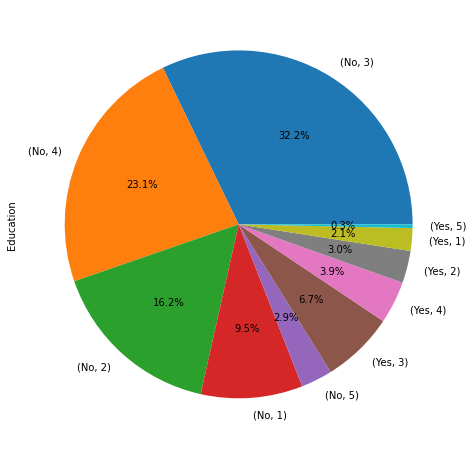

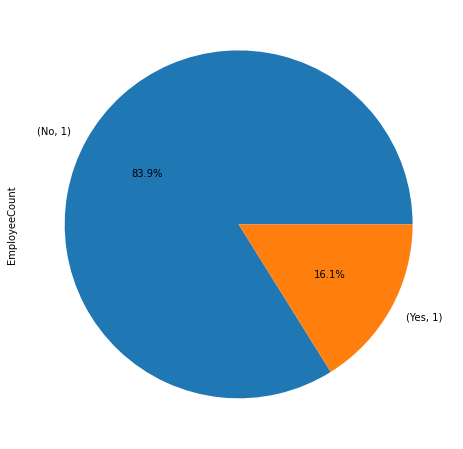

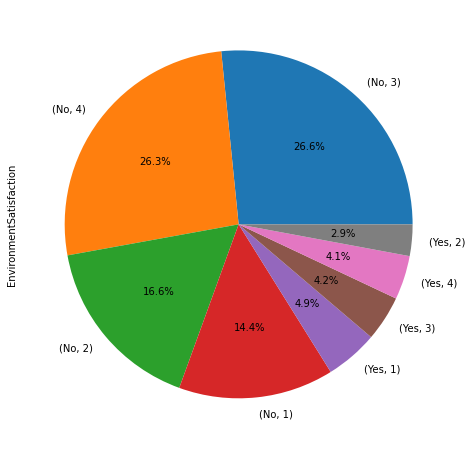

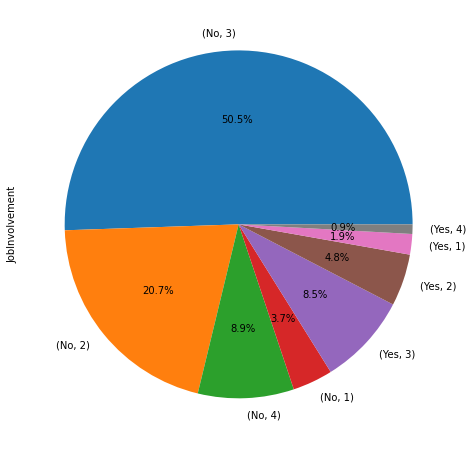

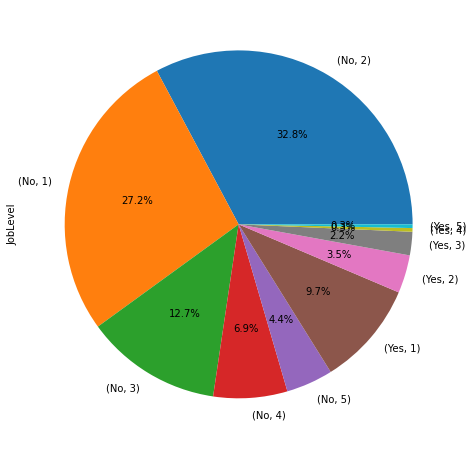

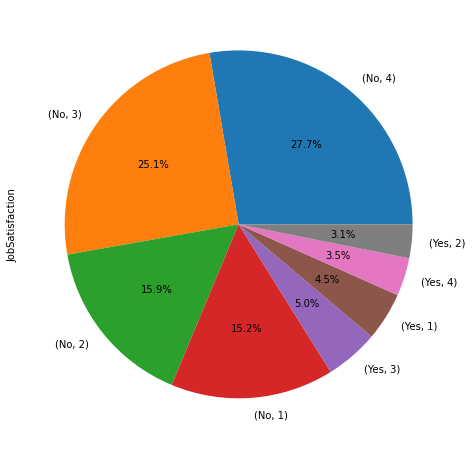

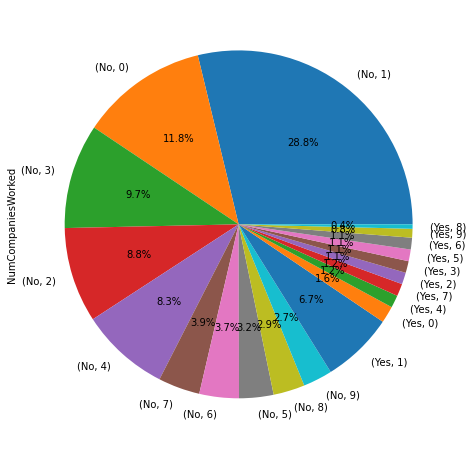

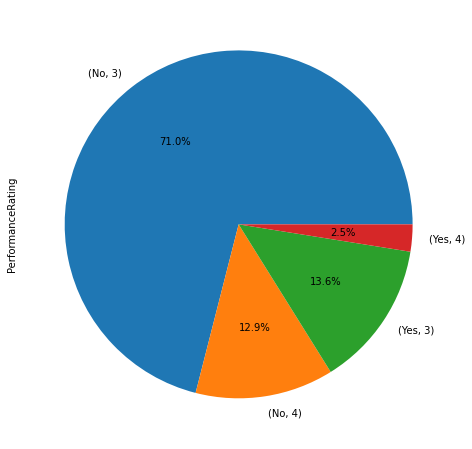

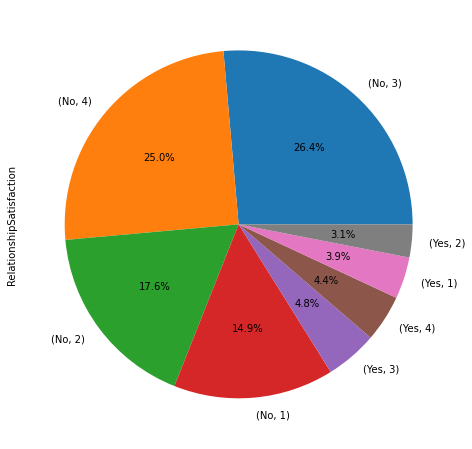

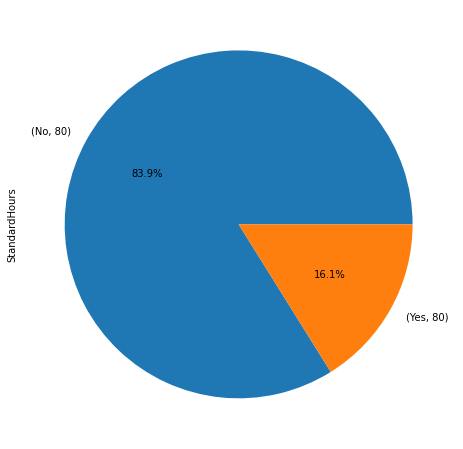

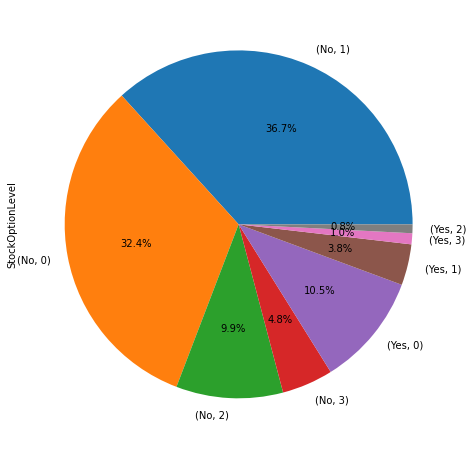

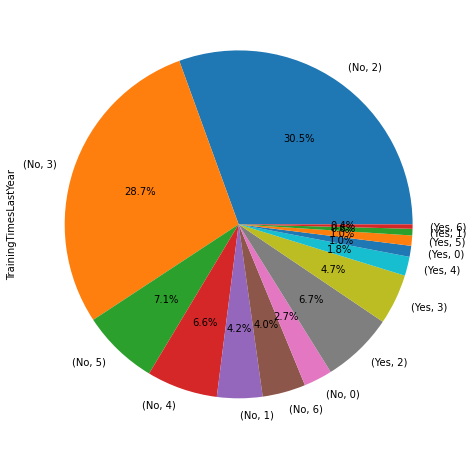

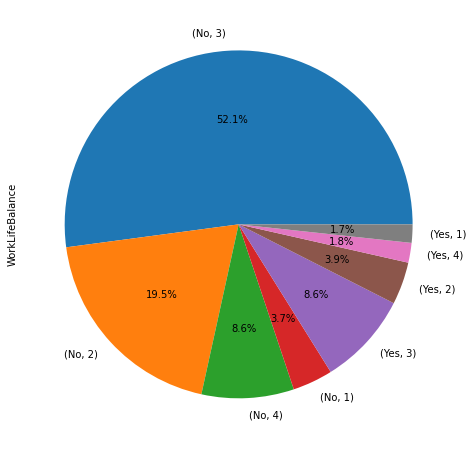

In [72]:
for i in df_categorical.columns:
    get = df.groupby('Attrition')[i].value_counts()
    plt.figure(figsize = (8,8))
    get.plot(kind = 'pie', autopct = '%1.1f%%')

#### Percentage observations:


1. Employee with 3 education level are more in attrition ratio of 6.7%. 

2. Environment satisfaction of employee are in range of 3 to 4 level more in attrition.

3. 8.5 percent employees are in the job involvent of level 3 are attrition more.

4. Job level are in range of 1 are more attrition upto 9.7 percent of the employees. 

5. Job satisfaction having 3 attrition more.

6. 1 year experience employee are more in the firm are attrition more.

7. Rating of employee are 3 level are attrited of ratio 13.6.

8. Relationship satisfaction with family and friends having level range 3 to 4 with approx  5.2 percent of the employees attrition.

9. 16.1 percent spent 80 hours of work from the dataset information are going to attrition.

10. Stack option upto 15.3 approx percent of employee are attrited.

11. Training times upto 2 to 3 range every employee get training with ratio of 70 percent since last year.

12. Employees having  3 level work life balance are attrition in the ratio of 8.6 which is highest among all level


## Checking rest columns of the dataset

In [73]:
df_rest_integer = df[['Age', 'DailyRate', 'DistanceFromHome','EmployeeNumber', 'HourlyRate', 
   'MonthlyIncome','MonthlyRate', 'PercentSalaryHike', 
   'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 
   'YearsWithCurrManager']]
df_rest_integer.head(5)

Age  DailyRate  DistanceFromHome  EmployeeNumber  HourlyRate  \
0   41       1102                 1               1          94   
1   49        279                 8               2          61   
2   37       1373                 2               4          92   
3   33       1392                 3               5          56   
4   27        591                 2               7          40   

   MonthlyIncome  MonthlyRate  PercentSalaryHike  TotalWorkingYears  \
0           5993        19479                 11                  8   
1           5130        24907                 23                 10   
2           2090         2396                 15                  7   
3           2909        23159                 11                  8   
4           3468        16632                 12                  6   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2

# Box Plot

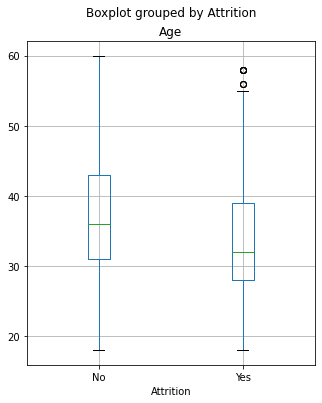

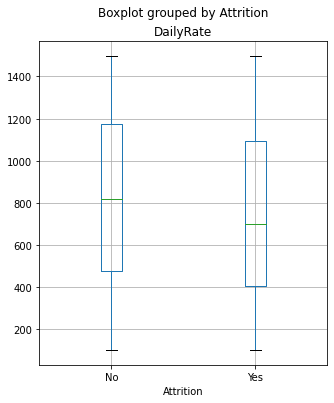

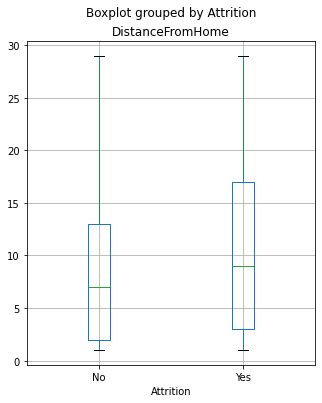

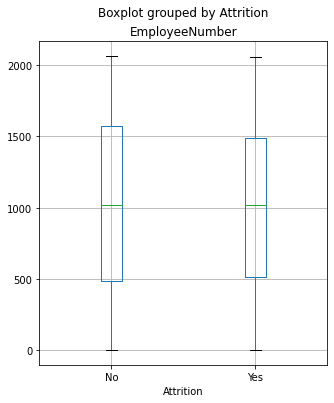

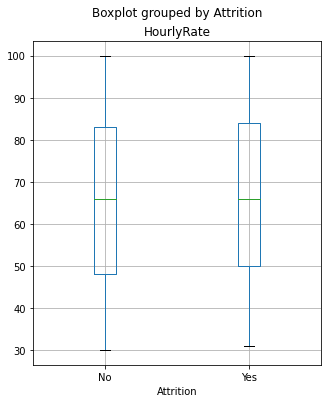

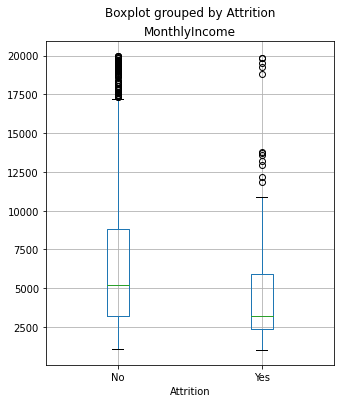

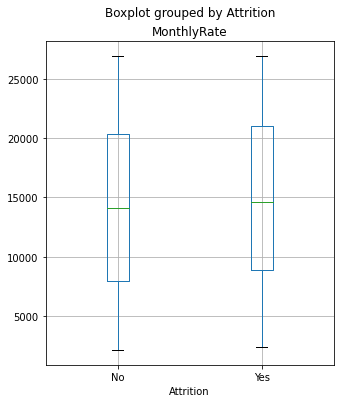

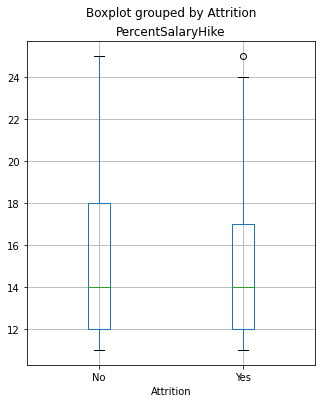

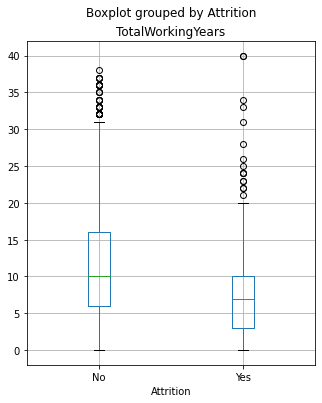

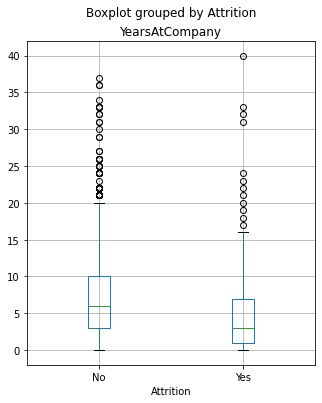

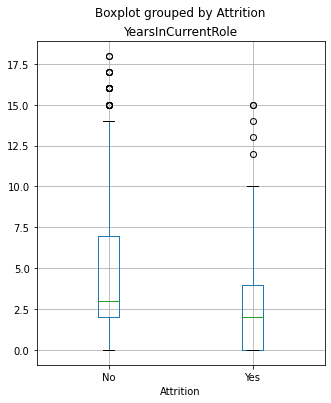

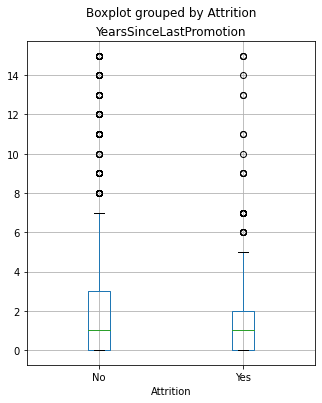

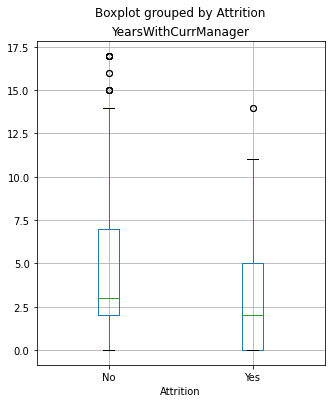

In [74]:
for i in df_rest_integer.columns:
    df.boxplot(column = i, by = 'Attrition', figsize = (5,6))    

### Observations:

1. Age: Attrition Yes employees are in the range of ages 28 to 38 approx which possibly going to interchange.

2. Daily rate: Daily rate are actually per day employees working cost lesser amount employee as per dataset range 400 to 1500 are going to attrition more.

3. Distance From Home: Employee having distance more thant 15 KMs from home to office are attrition more.

4. Employee Number: It is just a Unique Number to identify employees.

5. Hourly Rate: Income in hourly as per dataset there are not any observed condition that which employee going to attrition.

6. Monthly Income: Employee having lesser month income ranges between 1950 to 6000 are going to attrition more, also some of outlier present in yes attrition which make attrition for better prospectus.

7. Monthly Rate: Monthly Rate as per HR and employement attrition are the employees working capabilites in rate. Working with higher monthly rate are going to attrition more.

8. Percent Salary Hike: Employees which are not getting good salary hike attrition more.

9.  Total Working Years: Employers which are going to learn more for better propectus attrition more in lesser working years.

10. Year at Company: Employee having lesser year in company are going to attrition more. But dataset having some outliers.

11. Current Role: Working lesser year in current role are going to attrition more.

12. Promotion: After getting promotion within ranges 2 years employees switch.

13. Years with Manager: Employees which are spending upto 5 years with manager are going to attrition as per dataset. 

# Cleansing Dataset

### Dropping Unecessary Columns

#### From above analysis we find that some of dataset are unecessary:

EmployeeCount: Employee count is just to represent a dataset of single employee which we already know that dataset is of employee.

EmployeeNumber: Employee Number is just a unique number to identify employee we can't say that employee number is going to attrition hence it is not a necessary dataset. So we can drop it.
    
Over18: We know that working in a company employee should be 18+ hence over18 column is not much necessary.
       

In [91]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True, axis = 1)

In [92]:
df.shape  # checking after removing size of the dataset

(1470, 32)

### As we know that Rate, Monthly Income, Percent salary hike are the float values hence we need to convert it for better model predictions

In [93]:
df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']] = df[['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']].astype(float)

In [94]:
df.dtypes  # checking datatype

Age                           int64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                  float64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked            int64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

## Converting Categorical Dataset to Machine Understandable Form using Label Encoder

In [95]:
from sklearn.preprocessing import LabelEncoder
lec = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = lec.fit_transform(df[i].values.reshape(-1,1))

In [96]:
df.head(5)  #Checking result of label encoder

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2     1102.0           2                 1          2   
1   49               1      279.0           1                 8          1   
2   37               2     1373.0           1                 2          2   
3   33               1     1392.0           1                 3          4   
4   27               2      591.0           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0        94.0   
1               1                        3       1        61.0   
2               4                        4       1        92.0   
3               1                        4       0        56.0   
4               3                        1       1        40.0   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0         5993.0      19479.0                   8         1   
1         5130.0      24907.0                   1         0   
2         2090.0       2396.0                   6         1   
3         2909.0      23159.0                   1         1   
4         3468.0      16632.0                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0               11.0                  3                         1   
1               23.0                  4                         4   
2               15.0                  3                         2   
3               11.0                  3                         3   
4               12.0                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                        0                     5          1  
1                        1                     7          0  
2                        0                     0          1  
3                        3                     0          0  
4                        2                     2          0

In [97]:
df_out = df.select_dtypes(include = 'float').columns
df_out

Index(['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike'],
      dtype='object')

In [ ]:
# for i in df_out:
#     plt.figure()
#     sns.catplot(x=i, y= 'Attrition', data = df)
    
# Catplot taking so much time to plot

# Violin Plot

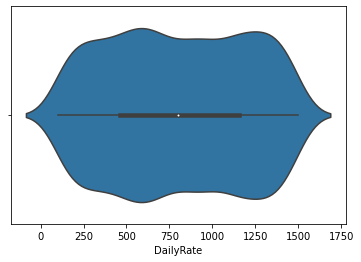

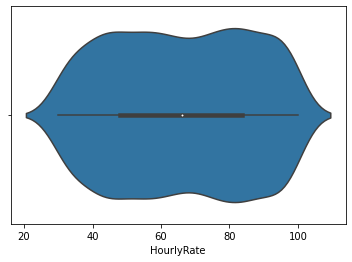

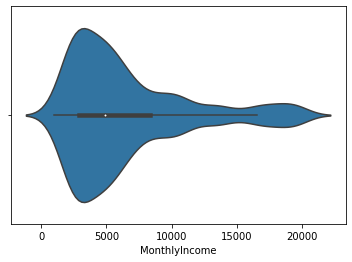

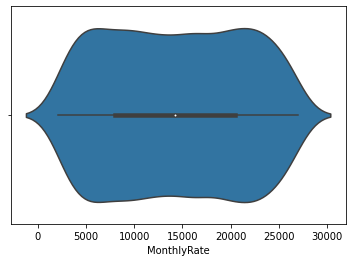

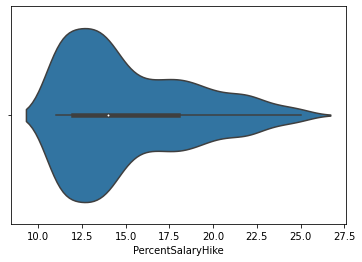

In [108]:
for i in df_out:
    plt.figure()
    sns.violinplot(df[i])


We find that more of the Montly income density lies between ranges 0 to 7000.

And Percent salary hike are in range of density 10 to 20 ratio.

Rest are approximately totally distributed

# Checking Outliers

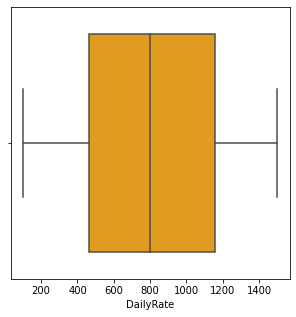

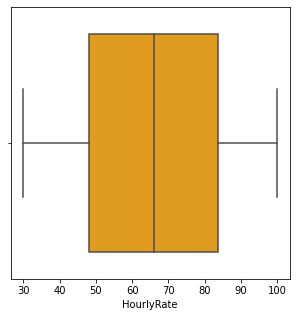

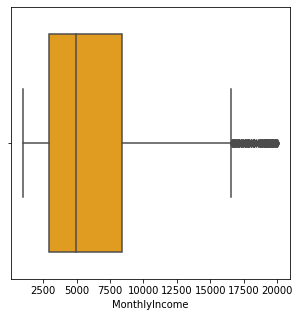

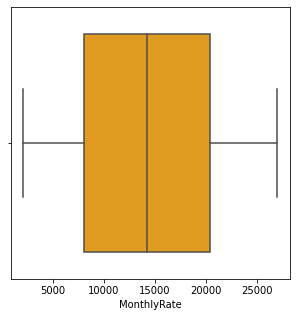

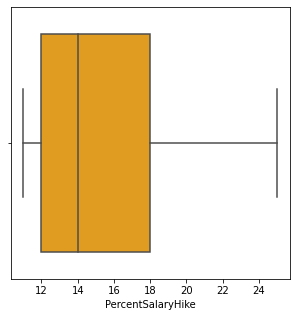

In [101]:
for i in df_out:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient='v', color='orange')

### From above graph we can find that Monthly income having outliers in the dataset.

# Checking Skewness

In [102]:
df[df_out].skew()

DailyRate           -0.003519
HourlyRate          -0.032311
MonthlyIncome        1.369817
MonthlyRate          0.018578
PercentSalaryHike    0.821128
dtype: float64

<Figure size 72x36 with 0 Axes>

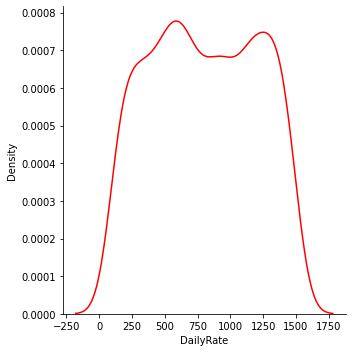

<Figure size 72x36 with 0 Axes>

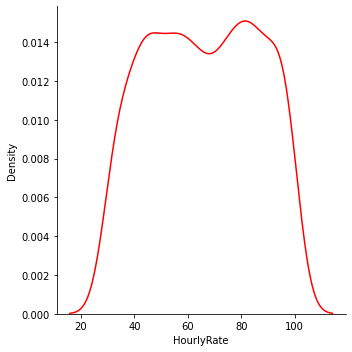

<Figure size 72x36 with 0 Axes>

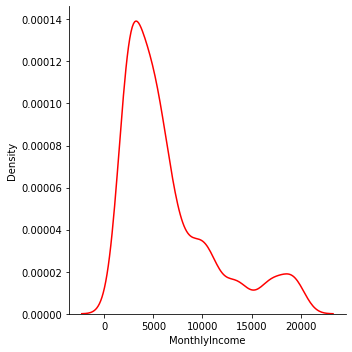

<Figure size 72x36 with 0 Axes>

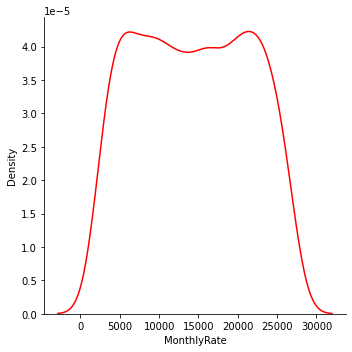

<Figure size 72x36 with 0 Axes>

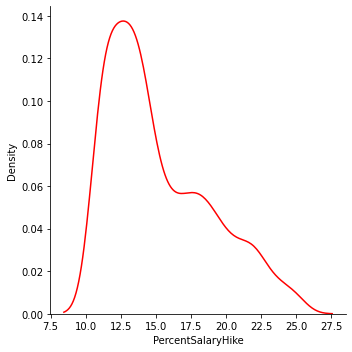

In [103]:
for i in df_out:
    plt.figure(figsize = (1,0.5))
    sns.displot(df[i], kind = 'kde', color = 'red',)

#### From above graphs we find that:
    
Daily Rate, Montly Incomre, Percentage Salary Hike are right skewed.

Hourly rate little bit right skewed.

Monthly rates show some normal distribution feature.

## Checking Distribution of Dataset

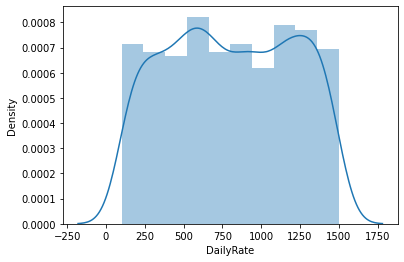

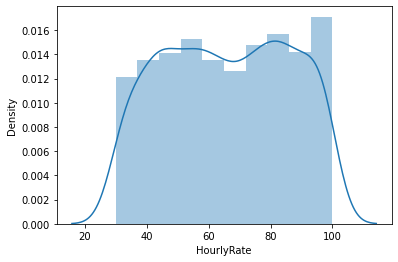

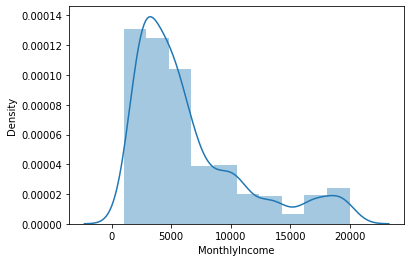

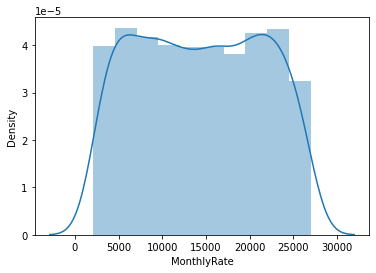

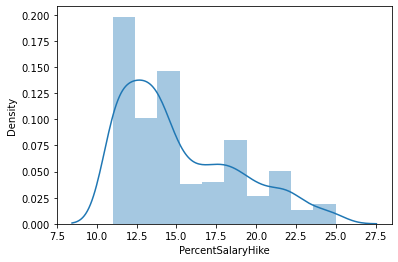

In [104]:
for i in df_out:
    plt.figure()
    sns.distplot(df[i], bins = 10)

### Observations: 

Daily Rate, Montly Income, Percentage Salary Hike are right distribution of the dataset.

Hourly rate shows some right distribution.

Monthly rates show some normal distribution feature.

# Checking Overall of the Dataset by Pairplot

<Figure size 1080x1080 with 0 Axes>

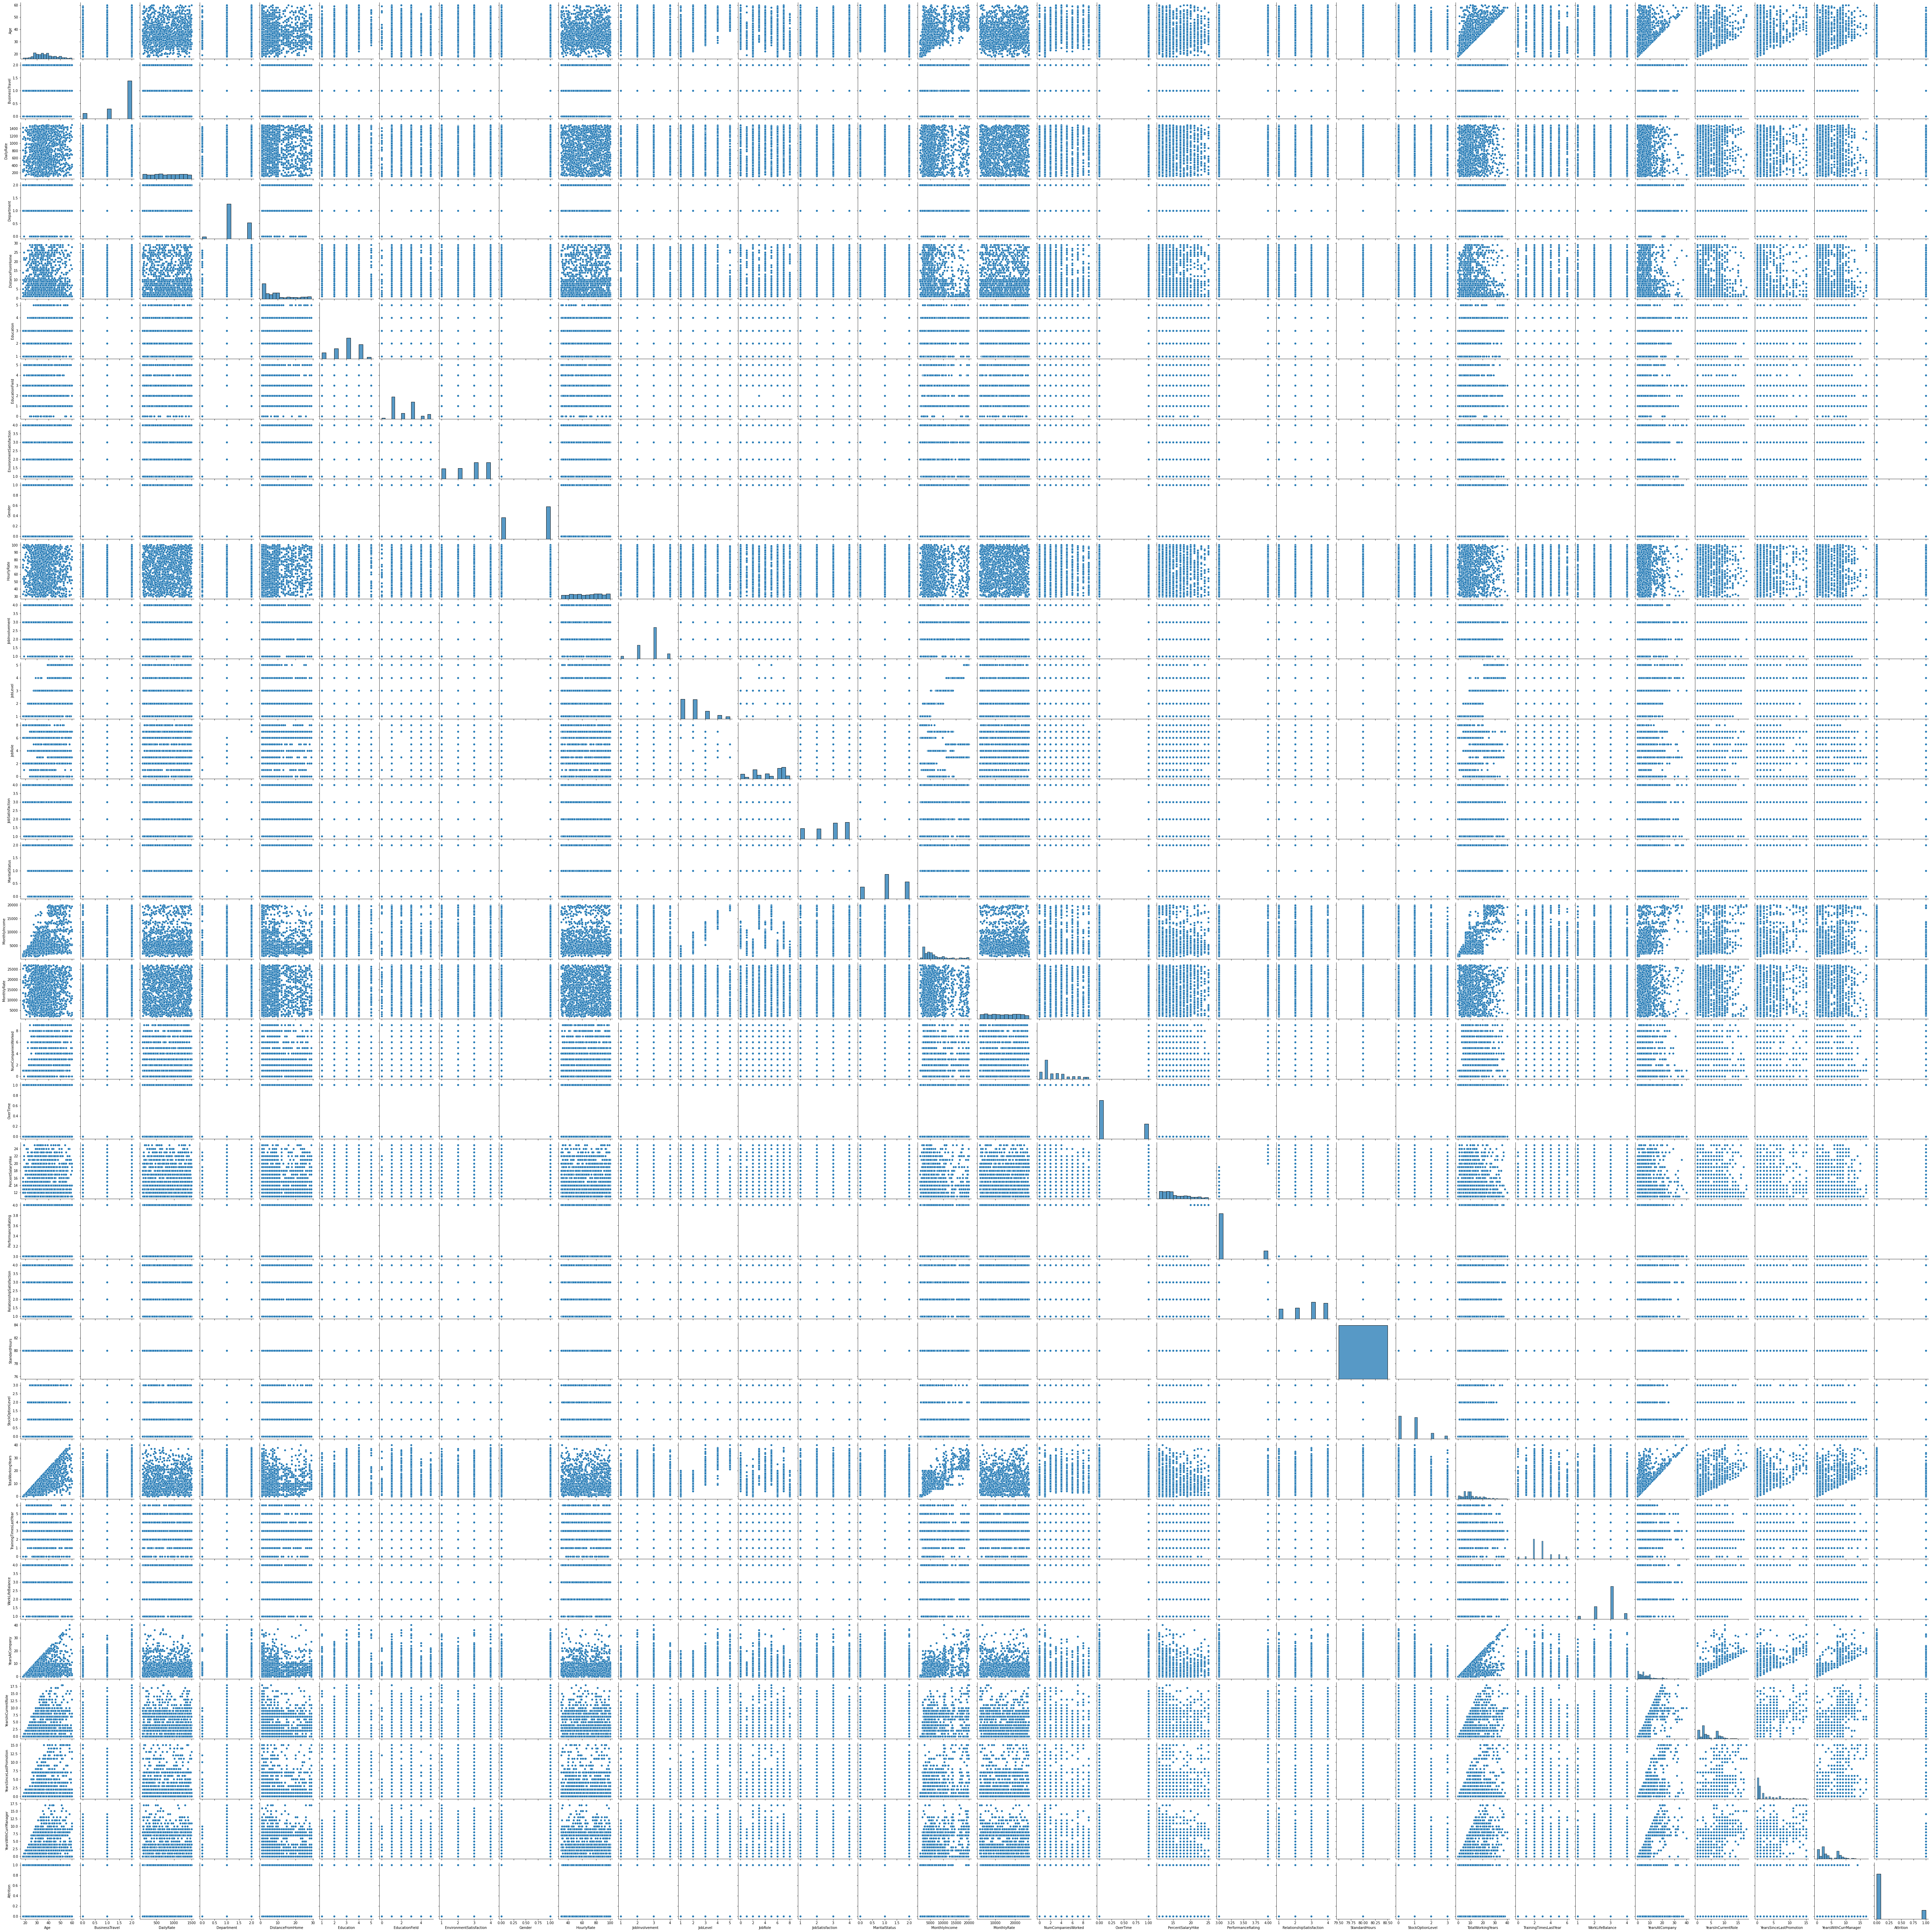

In [105]:
plt.figure(figsize = (15,15))
sns.pairplot(df)

#### Here we match analysis data with a single graph set. 
All observations match as per data analysis

# Preprocessing of the dataset

In [106]:
df.describe()

Age  BusinessTravel    DailyRate   Department  \
count  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810        1.607483   802.485714     1.260544   
std       9.135373        0.665455   403.509100     0.527792   
min      18.000000        0.000000   102.000000     0.000000   
25%      30.000000        1.000000   465.000000     1.000000   
50%      36.000000        2.000000   802.000000     1.000000   
75%      43.000000        2.000000  1157.000000     2.000000   
max      60.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender   HourlyRate  JobInvolvement     JobLevel      JobRole  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean      0.600000    65.891156        2.729932     2.063946     4.458503   
std       0.490065    20.329428        0.711561     1.106940     2.461821   
min       0.000000    30.000000        1.000000     1.000000     0.000000   
25%       0.000000    48.000000        2.000000     1.000000     2.000000   
50%       1.000000    66.000000        3.000000     2.000000     5.000000   
75%       1.000000    83.750000        3.000000     3.000000     7.000000   
max       1.000000   100.000000        4.000000     5.000000     8.000000   

       JobSatisfaction  MaritalStatus  MonthlyIncome   MonthlyRate  \
count      1470.000000    1470.000000    1470.000000   1470.000000   
mean          2.728571       1.097279    6502.931293  14313.103401   
std           1.102846       0.730121    4707.956783   7117.786044   
min           1.000000       0.000000    1009.000000   2094.000000   
25%           2.000000       1.000000    2911.000000   8047.000000   
50%           3.000000       1.000000    4919.000000  14235.500000   
75%           4.000000       2.000000    8379.000000  20461.500000   
max           4.000000       2.000000   19999.000000  26999.000000   

       NumCompaniesWorked     OverTime  PercentSalaryHike  PerformanceRating  \
count         1470.000000  1470.000000        1470.000000        1470.000000   
mean             2.693197     0.282993          15.209524           3.153741   
std              2.498009     0.450606           3.659938           0.360824   
min              0.000000     0.000000          11.000000           3.000000   
25%              1.000000     0.000000          12.000000           3.000000   
50%              2.000000     0.000000          14.000000           3.000000   
75%              4.000000     1.000000          18.000000           3.000000   
max              9.000000     1.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  

<AxesSubplot:>

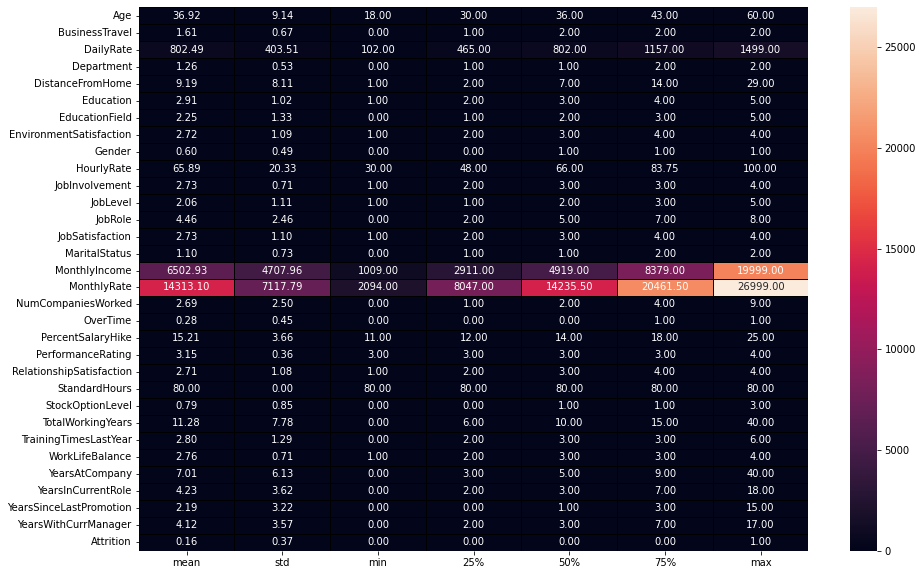

In [107]:
plt.figure(figsize = (15,10))
sns.heatmap(df.describe()[1:].transpose(), annot = True, linecolor='black', linewidths=0.5, fmt = '.2f')

#checking description visually

#### From above information we find that max values of Monthly income and monthly rate are much higher than its mean values. Due to these dataset columns probably having outliers.


# Checking Correlation of the Dataset

In [109]:
df.corr()

Age  BusinessTravel  DailyRate  Department  \
Age                       1.000000        0.024751   0.010661   -0.031882   
BusinessTravel            0.024751        1.000000  -0.004086   -0.009044   
DailyRate                 0.010661       -0.004086   1.000000    0.007109   
Department               -0.031882       -0.009044   0.007109    1.000000   
DistanceFromHome         -0.001686       -0.024469  -0.004985    0.017225   
Education                 0.208034        0.000757  -0.016806    0.007996   
EducationField           -0.040873        0.023724   0.037709    0.013720   
EnvironmentSatisfaction   0.010146        0.004174   0.018355   -0.019395   
Gender                   -0.036311       -0.032981  -0.011716   -0.041583   
HourlyRate                0.024287        0.026528   0.023381   -0.004144   
JobInvolvement            0.029820        0.039062   0.046135   -0.024586   
JobLevel                  0.509604        0.019311   0.002966    0.101963   
JobRole                  -0.122427        0.002724  -0.009472    0.662431   
JobSatisfaction          -0.004892       -0.033962   0.030571    0.021001   
MaritalStatus            -0.095029        0.024001  -0.069586    0.056073   
MonthlyIncome             0.497855        0.034319   0.007707    0.053130   
MonthlyRate               0.028051       -0.014107  -0.032182    0.023642   
NumCompaniesWorked        0.299635        0.020875   0.038153   -0.035882   
OverTime                  0.028062        0.016543   0.009135    0.007481   
PercentSalaryHike         0.003634       -0.029377   0.022704   -0.007840   
PerformanceRating         0.001904       -0.026341   0.000473   -0.024604   
RelationshipSatisfaction  0.053535       -0.035986   0.007846   -0.022414   
StandardHours                  NaN             NaN        NaN         NaN   
StockOptionLevel          0.037510       -0.016727   0.042143   -0.012193   
TotalWorkingYears         0.680381        0.034226   0.014515   -0.015762   
TrainingTimesLastYear    -0.019621        0.015240   0.002453    0.036875   
WorkLifeBalance          -0.021490       -0.011256  -0.037848    0.026383   
YearsAtCompany            0.311309       -0.014575  -0.034055    0.022920   
YearsInCurrentRole        0.212901       -0.011497   0.009932    0.056315   
YearsSinceLastPromotion   0.216513       -0.032591  -0.033229    0.040061   
YearsWithCurrManager      0.202089       -0.022636  -0.026363    0.034282   
Attrition                -0.159205        0.000074  -0.056652    0.063991   

                          DistanceFromHome  Education  EducationField  \
Age                              -0.001686   0.208034       -0.040873   
BusinessTravel                   -0.024469   0.000757        0.023724   
DailyRate                        -0.004985  -0.016806        0.037709   
Department                        0.017225   0.007996        0.013720   
DistanceFromHome                  1.000000   0.021042        0.002013   
Education                         0.021042   1.000000       -0.039592   
EducationField                    0.002013  -0.039592        1.000000   
EnvironmentSatisfaction          -0.016075  -0.027128        0.043163   
Gender                           -0.001851  -0.016547       -0.002504   
HourlyRate                        0.031131   0.016775       -0.021941   
JobInvolvement                    0.008783   0.042438       -0.002655   
JobLevel                          0.005303   0.101589       -0.044933   
JobRole                          -0.001015   0.004236        0.015599   
JobSatisfaction                  -0.003669  -0.011296       -0.034401   
MaritalStatus                    -0.014437   0.004053        0.014420   
MonthlyIncome                    -0.017014   0.094961       -0.041070   
MonthlyRate                       0.027473  -0.026084       -0.027182   
NumCompaniesWorked               -0.029251   0.126317       -0.008663   
OverTime                          0.025514  -0.020322        0.002259   
PercentSalaryHike            

<AxesSubplot:>

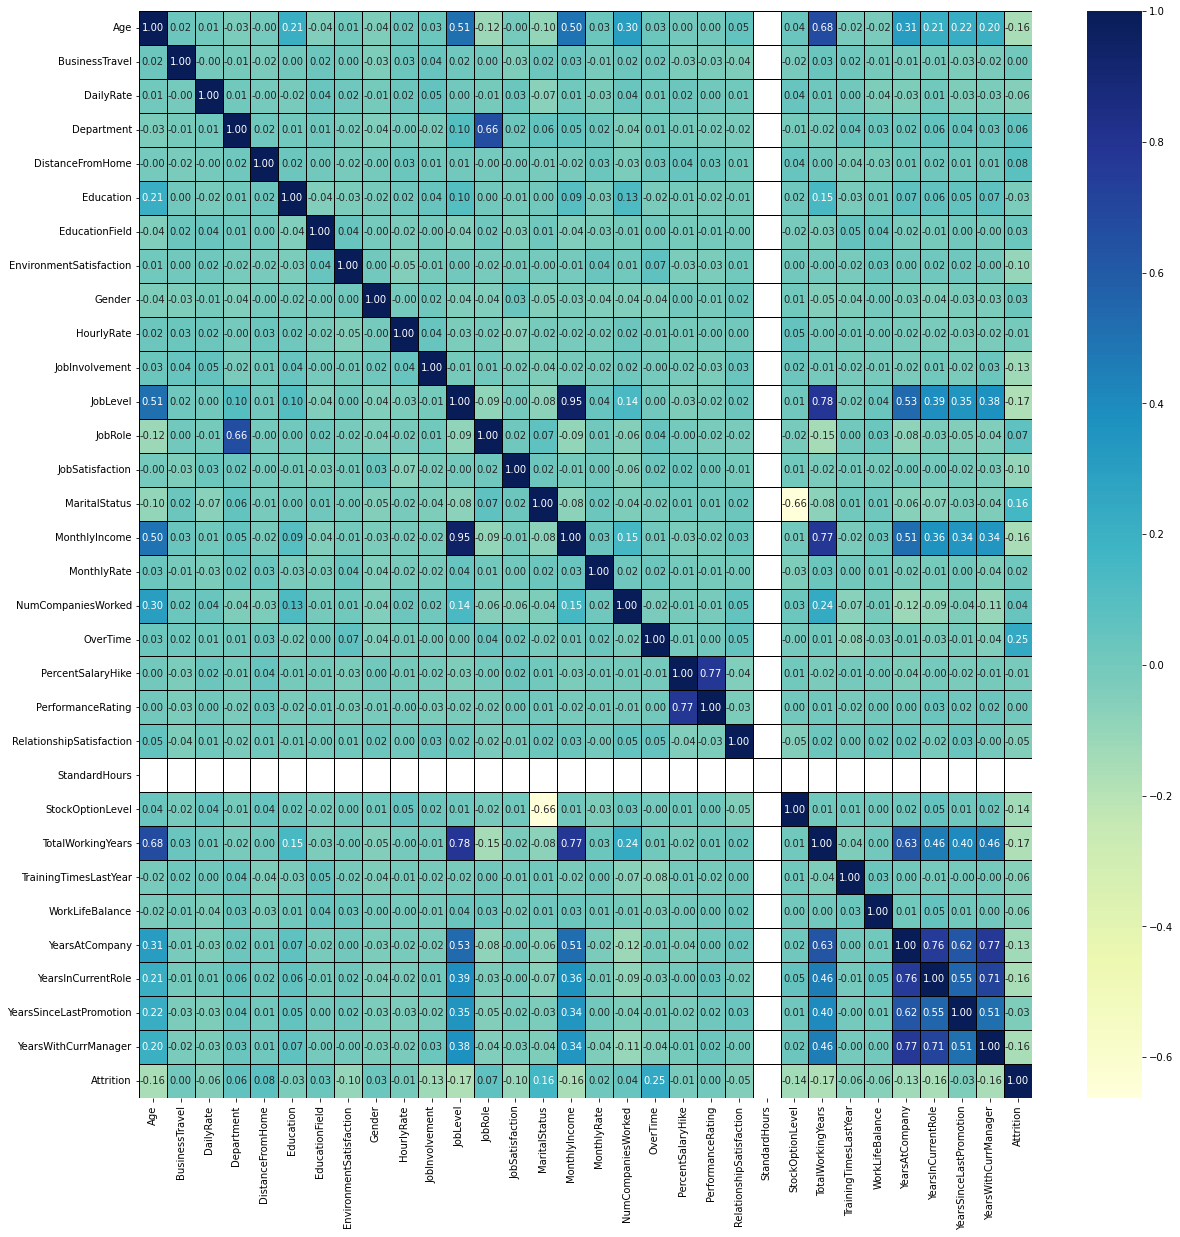

In [110]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, linecolor = 'black', linewidths = 1, fmt = '.2f', cmap="YlGnBu" )

Total working years are highly correlated to job level, monthly income and vice versa.
Year at company are highly correlated towards current role, last promotion, years with current manager.
Perfomance rating is highly correlated with salary hike.


# Checking Positive and Negative Correlation with the continuos dataset

In [111]:
df[df_out].corr()

DailyRate  HourlyRate  MonthlyIncome  MonthlyRate  \
DailyRate           1.000000    0.023381       0.007707    -0.032182   
HourlyRate          0.023381    1.000000      -0.015794    -0.015297   
MonthlyIncome       0.007707   -0.015794       1.000000     0.034814   
MonthlyRate        -0.032182   -0.015297       0.034814     1.000000   
PercentSalaryHike   0.022704   -0.009062      -0.027269    -0.006429   

                   PercentSalaryHike  
DailyRate                   0.022704  
HourlyRate                 -0.009062  
MonthlyIncome              -0.027269  
MonthlyRate                -0.006429  
PercentSalaryHike           1.000000

<AxesSubplot:>

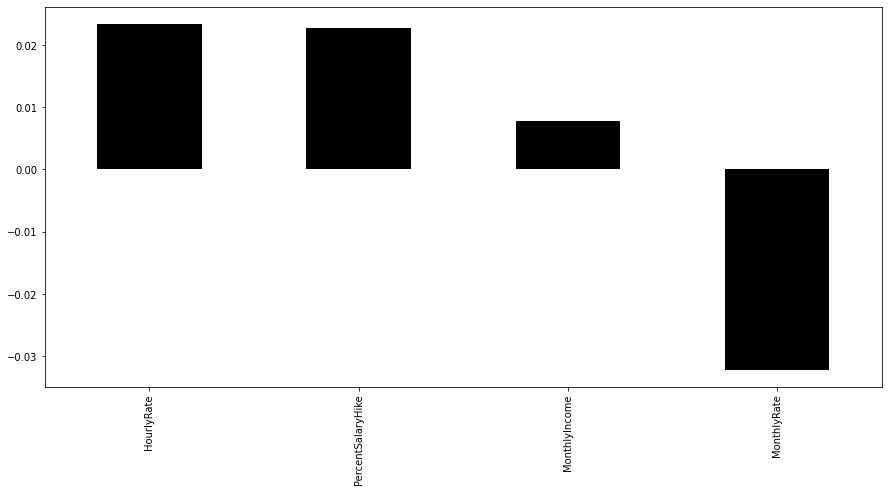

In [112]:
plt.figure(figsize = (15,7))
df[df_out].corr()['DailyRate'].sort_values(ascending = False).drop('DailyRate').plot(kind = 'bar', color = 'k')

#### Monthly Rate shows negative correlation towards the dataset.

#### 

# Removing Outliers from the Dataset

In [113]:
from scipy.stats import zscore

z = np.abs(zscore(df[df_out]))

# taking thresold value = 3
#np.where(z>3)

df_new = df[(z<3).all(axis = 1)]

In [114]:
np.where(z>3)  

(array([], dtype=int64), array([], dtype=int64))

#### From above code we find that there is no value find greater than thresold values

#### 

# Removing Outliers with Interquartile Method

In [115]:
Q1 = df[df_out].quantile(.25)
Q3 = df[df_out].quantile(.75)
IQR = Q3 - Q1

In [116]:
df_IQR = df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis = 1)]

In [117]:
print(df_IQR.shape)
print(df.shape)

(1356, 32)
(1470, 32)


## Percentage of Data Loss with Interquartile Method

In [118]:
percentage = round((1470-1356)/1470*100,2)
print(percentage, "Percentage of data loss")   # Not much dataloss hence we can consider it.

7.76 Percentage of data loss


### From above two observations we find that Interquartile method show lesser data loss hence we can considering it for outliers removal.

## Checking Outliers after removal

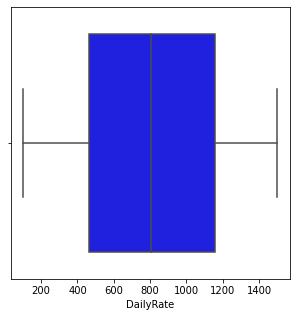

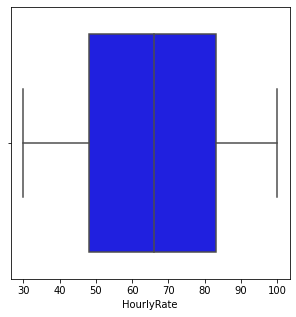

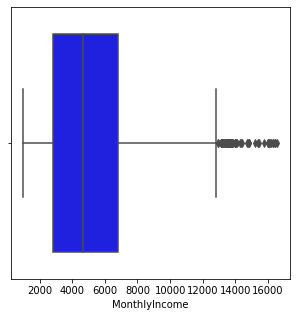

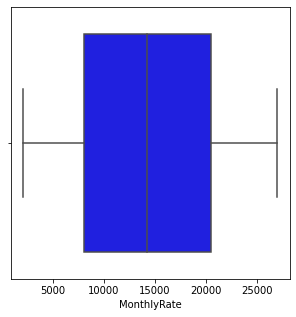

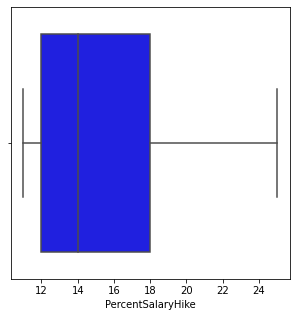

In [119]:
for i in df_out:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_IQR[i], orient='v', color='blue')

### From above code we can see much difference in the outliers of monthly income has been decreased

# Removing Skewness

In [120]:
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer('yeo-johnson')

In [121]:
df_IQR[df_out].skew()  # checking skewness

DailyRate           -0.002620
HourlyRate          -0.035856
MonthlyIncome        1.194390
MonthlyRate          0.019849
PercentSalaryHike    0.797353
dtype: float64

### Skewness of MonthlyIncome and PercentSalaryHike are not in acceptable range hence we need to fix them

In [122]:
df_skew = df_IQR[df_out].copy()

In [123]:
skew_x = pw.fit_transform(df_skew)

In [124]:
df_n = pd.DataFrame(skew_x, columns = df_skew.columns)

In [125]:
df_n.skew() 

DailyRate           -0.195977
HourlyRate          -0.106932
MonthlyIncome        0.000000
MonthlyRate         -0.183306
PercentSalaryHike    0.111421
dtype: float64

#### Above code we find after removing outlier monthly income get nullify hence we can't consider it because monthly income is highly correlated toward dataset.

## Removing Skewness by Log Method

In [126]:
df_IQR[['MonthlyIncome', 'PercentSalaryHike']] = np.log(df_IQR[['MonthlyIncome', 'PercentSalaryHike']])
df_IQR[['MonthlyIncome', 'PercentSalaryHike']].skew()

MonthlyIncome        0.138032
PercentSalaryHike    0.471948
dtype: float64

In [127]:
df_IQR[df_out].skew()

DailyRate           -0.002620
HourlyRate          -0.035856
MonthlyIncome        0.138032
MonthlyRate          0.019849
PercentSalaryHike    0.471948
dtype: float64

### All are in the acceptable range within +/-0.5

In [128]:
df_IQR.head(5)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2     1102.0           2                 1          2   
1   49               1      279.0           1                 8          1   
2   37               2     1373.0           1                 2          2   
3   33               1     1392.0           1                 3          4   
4   27               2      591.0           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0        94.0   
1               1                        3       1        61.0   
2               4                        4       1        92.0   
3               1                        4       0        56.0   
4               3                        1       1        40.0   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       8.698347      19479.0                   8         1   
1       8.542861      24907.0                   1         0   
2       7.644919       2396.0                   6         1   
3       7.975565      23159.0                   1         1   
4       8.151333      16632.0                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0           2.397895                  3                         1   
1           3.135494                  4                         4   
2           2.708050                  3                         2   
3           2.397895                  3                         3   
4           2.484907                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                        0                     5          1  
1                        1                     7          0  
2                        0                     0          1  
3                        3                     0          0  
4                        2                     2          0

# Dividing data for feature selection

In [129]:
x = df_IQR.iloc[:,:-1]
y = df_IQR.iloc[:,-1]

In [130]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (1356, 31)
Shape of y (1356,)


## Checking multicolinearity of the dataset

In [131]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = df_IQR.columns
    vif["VIF Factor"] = [variance_inflation_factor(df_IQR.values, i) for i in range(df_IQR.shape[1])]
    return vif

In [133]:
calc_vif(x)

Variance   VIF Factor
0                        Age     1.825474
1             BusinessTravel     1.015531
2                  DailyRate     1.032093
3                 Department     2.287544
4           DistanceFromHome     1.028930
5                  Education     1.070503
6             EducationField     1.018717
7    EnvironmentSatisfaction     1.047787
8                     Gender     1.027873
9                 HourlyRate     1.020869
10            JobInvolvement     1.041128
11                  JobLevel     6.065574
12                   JobRole     2.143765
13           JobSatisfaction     1.040314
14             MaritalStatus     1.871459
15             MonthlyIncome     5.417855
16               MonthlyRate     1.019172
17        NumCompaniesWorked     1.298955
18                  OverTime     1.124125
19         PercentSalaryHike     2.101330
20         PerformanceRating     2.104837
21  RelationshipSatisfaction     1.027963
22             StandardHours  1158.596807
23          StockOptionLevel     1.840409
24         TotalWorkingYears     3.740591
25     TrainingTimesLastYear     1.031050
26           WorkLifeBalance     1.021665
27            YearsAtCompany     4.970803
28        YearsInCurrentRole     2.976683
29   YearsSinceLastPromotion     1.619398
30      YearsWithCurrManager     2.870954
31                 Attrition     1.307524

### From above code we find that StandardHours is higly correlated towards the dataset. Hence we need to drop it.

In [134]:
x.drop('StandardHours', inplace = True, axis = 1)

In [135]:
x.head(2)

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2     1102.0           2                 1          2   
1   49               1      279.0           1                 8          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0        94.0   
1               1                        3       1        61.0   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0       8.698347      19479.0                   8         1   
1       8.542861      24907.0                   1         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0           2.397895                  3                         1   
1           3.135494                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

# Sythetic Minority Oversampling Technique

<AxesSubplot:xlabel='Attrition', ylabel='count'>

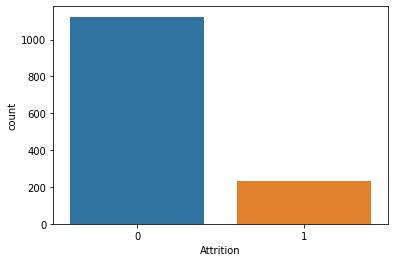

In [136]:
sns.countplot(y)

### We find that attrition values are not balanced and training these dataset for machine learning show biased prediction hence we need to fix it.

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [139]:
print(x.shape)
print(y.shape)

(2248, 30)
(2248,)


1    1124
0    1124
Name: Attrition, dtype: int64


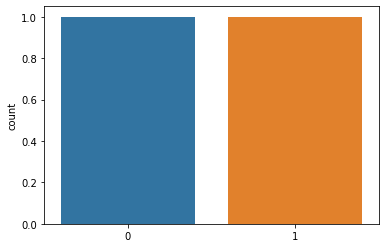

In [140]:
sns.countplot(y.unique())
print(y.value_counts())

## Using Get Dummies Method to prevent overfitting of Model as Model having so many columns with Multiple Unique Values

In [141]:
x = pd.get_dummies(data = x, columns = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 
                                     'Gender','JobInvolvement','JobLevel',
                                     'JobRole','JobSatisfaction','MaritalStatus', 'OverTime','WorkLifeBalance', 'RelationshipSatisfaction','StockOptionLevel'])

In [142]:
print(x.shape)
x.head(1)

(2248, 76)


Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41     1102.0                 1        94.0       8.698347      19479.0   

   NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                   8           2.397895                  3   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                  8                      0               6   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   

   BusinessTravel_0  BusinessTravel_1  BusinessTravel_2  Department_0  \
0                 0                 0                 1             0   

   Department_1  Department_2  Education_1  Education_2  Education_3  \
0             0             1            0            1            0   

   Education_4  Education_5  EducationField_0  EducationField_1  \
0            0            0                 0                 1   

   EducationField_2  EducationField_3  EducationField_4  EducationField_5  \
0                 0                 0                 0                 0   

   EnvironmentSatisfaction_1  EnvironmentSatisfaction_2  \
0                          0                          1   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  Gender_0  Gender_1  \
0                          0                          0         1         0   

   JobInvolvement_1  JobInvolvement_2  JobInvolvement_3  JobInvolvement_4  \
0                 0                 0                 1                 0   

   JobLevel_1  JobLevel_2  JobLevel_3  JobLevel_4  JobRole_0  JobRole_1  \
0           0           1           0           0          0          0   

   JobRole_2  JobRole_3  JobRole_4  JobRole_5  JobRole_6  JobRole_7  \
0          0          0          0          0          0          1   

   JobRole_8  JobSatisfaction_1  JobSatisfaction_2  JobSatisfaction_3  \
0          0                  0                  0                  0   

   JobSatisfaction_4  MaritalStatus_0  MaritalStatus_1  MaritalStatus_2  \
0                  1                0                0                1   

   OverTime_0  OverTime_1  WorkLifeBalance_1  WorkLifeBalance_2  \
0           0           1                  1                  0   

   WorkLifeBalance_3  WorkLifeBalance_4  RelationshipSatisfaction_1  \
0                  0                  0                           1   

   RelationshipSatisfaction_2  RelationshipSatisfaction_3  \
0                           0                           0   

   RelationshipSatisfaction_4  StockOptionLevel_0  StockOptionLevel_1  \
0                           0                   1                   0   

   StockOptionLevel_2  StockOptionLevel_3  
0                   0                   0

#### 

# Scaling Dataset

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [144]:
df_cont = x.select_dtypes(include = ['int', 'float']).columns

In [145]:
x[df_cont] = sc.fit_transform(x[df_cont])

In [146]:
df_cont = x.select_dtypes(include = ['int', 'float']).columns

In [147]:
x = pd.DataFrame(x, columns = x.columns)

In [148]:
x.head(2)

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.743736   0.818177         -1.153139    1.509022       0.610292   
1  1.672837  -1.291391         -0.239821   -0.255818       0.331311   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0     0.714287            2.327584          -1.388601          -0.331849   
1     1.475678           -0.676095           2.080994           3.013423   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0          -0.142526              -2.102044        0.106221   
1           0.179483               0.348887        0.931753   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            0.212809                -0.652808              0.545889   
1            1.170877                -0.279870              1.182713   

   BusinessTravel_0  BusinessTravel_1  BusinessTravel_2  Department_0  \
0                 0                 0                 1             0   
1                 0                 1                 0             0   

   Department_1  Department_2  Education_1  Education_2  Education_3  \
0             0             1            0            1            0   
1             1             0            1            0            0   

   Education_4  Education_5  EducationField_0  EducationField_1  \
0            0            0                 0                 1   
1            0            0                 0                 1   

   EducationField_2  EducationField_3  EducationField_4  EducationField_5  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   EnvironmentSatisfaction_1  EnvironmentSatisfaction_2  \
0                          0                          1   
1                          0                          0   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  Gender_0  Gender_1  \
0                          0                          0         1         0   
1                          1                          0         0         1   

   JobInvolvement_1  JobInvolvement_2  JobInvolvement_3  JobInvolvement_4  \
0                 0                 0                 1                 0   
1                 0                 1                 0                 0   

   JobLevel_1  JobLevel_2  JobLevel_3  JobLevel_4  JobRole_0  JobRole_1  \
0           0           1           0           0          0          0   
1           0           1           0           0          0          0   

   JobRole_2  JobRole_3  JobRole_4  JobRole_5  JobRole_6  JobRole_7  \
0          0          0          0          0          0          1   
1          0          0          0          0          1          0   

   JobRole_8  JobSatisfaction_1  JobSatisfaction_2  JobSatisfaction_3  \
0          0                  0                  0                  0   
1          0                  0                  1                  0   

   JobSatisfaction_4  MaritalStatus_0  MaritalStatus_1  MaritalStatus_2  \
0                  1                0                0                1   
1                  0                0                1                0   

   OverTime_0  OverTime_1  WorkLifeBalance_1  WorkLifeBalance_2  \
0           0           1                  1                  0   
1           1           0                  0                  0   

   WorkLifeBalance_3  WorkLifeBalance_4  RelationshipSatisfaction_1  \
0                  0                  0                           1   
1                  1                  0                           0   

   RelationshipSatisfaction_2  RelationshipSatisfaction_3  \
0                           0                           0   
1                           0                           0   

   RelationshipSatisfaction_4  StockOptionLevel_0  StockOptionLevel_1  \
0                           0                   1                   0   
1      

# Feature Selection

### Since output variables having boolean variables hence we use classification model

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [150]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,300):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.30)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            print('cross_val_score', cv*100,'at cv =', value,"\n")


# Model 1 Logisitc Regression

In [161]:
model = LogisticRegression()

In [162]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 152
Training accuracy_score is:- 87.98474253019708
Testing accuracy_score is:- 88.0


At random_state:- 176
Training accuracy_score is:- 88.55689764780675
Testing accuracy_score is:- 88.5925925925926


Best fit random_state_values [152, 176]


#### Model giving best accuracy score at random state value 176

In [163]:
best_model.final_model(x, y, model, 176)

At random state 176 model giving best accuracy score 

Training accuracy:-  88.55689764780675
Testing accuracy:-  88.5925925925926


--------------------------------------
Confusion Matrix
[[293  35]
 [ 42 305]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.90      0.88      0.89       347

    accuracy                           0.89       675
   macro avg       0.89      0.89      0.89       675
weighted avg       0.89      0.89      0.89       675



In [164]:
best_model.cross_val_score(model, x, y)

cross_val_score 82.87366548042705 at cv = 2 

cross_val_score 83.6345942738466 at cv = 3 

cross_val_score 83.98576512455516 at cv = 4 

cross_val_score 84.56867112100966 at cv = 5 

cross_val_score 85.59180035650624 at cv = 6 

cross_val_score 86.30665594153142 at cv = 7 



# Model 2 SGD Classifier

In [183]:
model = SGDClassifier()

In [184]:
best_model.best_fit(x, y, model)   #finding best random state

At random_state:- 7
Training accuracy_score is:- 80.67387158296249
Testing accuracy_score is:- 80.74074074074075


At random_state:- 37
Training accuracy_score is:- 85.50540368722187
Testing accuracy_score is:- 85.48148148148148


At random_state:- 78
Training accuracy_score is:- 82.70820089001907
Testing accuracy_score is:- 82.66666666666667


Best fit random_state_values [7, 37, 78]


#### Model giving best accuracy score at random state value 37

In [187]:
best_model.final_model(x, y, model, 37)

At random state 37 model giving best accuracy score 

Training accuracy:-  85.2511125238398
Testing accuracy:-  84.74074074074073


--------------------------------------
Confusion Matrix
[[308  71]
 [ 32 264]]


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       379
           1       0.79      0.89      0.84       296

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675



In [188]:
best_model.cross_val_score(model, x, y)

cross_val_score 79.35943060498221 at cv = 2 

cross_val_score 80.6971665924937 at cv = 3 

cross_val_score 83.49644128113879 at cv = 4 

cross_val_score 79.09844097995546 at cv = 5 

cross_val_score 81.7668449197861 at cv = 6 

cross_val_score 83.63725823527298 at cv = 7 



# Model 3 KNeighorsClassifier

In [183]:
model = KNeighborsClassifier()

In [184]:
best_model.best_fit(x, y, model)  #finding best random state

Best fit random_state_values []


### For case in KNeighbor Classifier we find that there is no random state value in which accuracy_score seems equals to training and testing values

#### Selecting some random values for checking KNeighborsClassifier

In [188]:
for i in range(10):
    best_model.final_model(x, y, model, i)

At random state 0 model giving best accuracy score 

Training accuracy:-  91.29052765416402
Testing accuracy:-  83.7037037037037


--------------------------------------
Confusion Matrix
[[249  23]
 [ 87 316]]


Classification Report
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       272
           1       0.93      0.78      0.85       403

    accuracy                           0.84       675
   macro avg       0.84      0.85      0.84       675
weighted avg       0.86      0.84      0.84       675

At random state 1 model giving best accuracy score 

Training accuracy:-  90.97266369993643
Testing accuracy:-  85.33333333333334


--------------------------------------
Confusion Matrix
[[259  15]
 [ 84 317]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       274
           1       0.95      0.79      0.86       401

    accuracy                           0

#### Accuracy score of training and testing not match hence model not performing well for learning references.

# Model 4 GaussianNB

In [189]:
model = GaussianNB()

In [190]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 2
Training accuracy_score is:- 80.29243483788939
Testing accuracy_score is:- 80.2962962962963


At random_state:- 8
Training accuracy_score is:- 80.67387158296249
Testing accuracy_score is:- 80.74074074074075


At random_state:- 71
Training accuracy_score is:- 80.86458995549904
Testing accuracy_score is:- 80.88888888888889


At random_state:- 116
Training accuracy_score is:- 80.737444373808
Testing accuracy_score is:- 80.74074074074075


At random_state:- 137
Training accuracy_score is:- 80.99173553719008
Testing accuracy_score is:- 81.03703703703704


Best fit random_state_values [2, 8, 71, 116, 137]


#### Model giving best accuracy score at random state value 137.

In [191]:
best_model.final_model(x, y, model, 137)

At random state 137 model giving best accuracy score 

Training accuracy:-  80.99173553719008
Testing accuracy:-  81.03703703703704


--------------------------------------
Confusion Matrix
[[255  48]
 [ 80 292]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       303
           1       0.86      0.78      0.82       372

    accuracy                           0.81       675
   macro avg       0.81      0.81      0.81       675
weighted avg       0.81      0.81      0.81       675



In [192]:
best_model.cross_val_score(model, x, y)

cross_val_score 77.35765124555161 at cv = 2 

cross_val_score 77.58516540572616 at cv = 3 

cross_val_score 78.42526690391459 at cv = 4 

cross_val_score 78.82999257609502 at cv = 5 

cross_val_score 79.4969696969697 at cv = 6 

cross_val_score 79.7690226029461 at cv = 7 



# Model 5 DecisionTreeClassifier

In [193]:
model = DecisionTreeClassifier()

In [194]:
best_model.best_fit(x, y, model)

Best fit random_state_values []


### For case in KNeighbor Classifier we find that there is no random state value in which accuracy_score seems equals to training and testing values

#### Selecting some random values for checking KNeighborsClassifier

In [195]:
for i in range(10):
    best_model.final_model(x, y, model, i)

At random state 0 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  79.11111111111111


--------------------------------------
Confusion Matrix
[[254  59]
 [ 82 280]]


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       313
           1       0.83      0.77      0.80       362

    accuracy                           0.79       675
   macro avg       0.79      0.79      0.79       675
weighted avg       0.79      0.79      0.79       675

At random state 1 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  77.48148148148148


--------------------------------------
Confusion Matrix
[[258  67]
 [ 85 265]]


Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       325
           1       0.80      0.76      0.78       350

    accuracy                           0.77       675
   macro 

## Glimpse of the Best Machine Learning Models

In [196]:
# models                 accuracy_score_training  accuracy_score_training  CV score        CV state    Differences

# LogisticRegression     88.55689764780675         88.5925925925926      86.30665594153142       7      0.006310188128367145
# SGDClassifier          86.07755880483154         86.07407407407408     82.74188948306595     6      0.0034847307574636943
# GaussianNB             80.99173553719008         81.03703703703704     79.50130885348857     7      0.04530149984695697

# From above Machine Learning Model we find that Logisitc Regression show highest accuracy with Neglible error.
Hence we are selecting it for model learning.

# Ensemble Technique

## Hyper Parameter Tuning

In [198]:
# using hyper parameter tuning for Logistic regression regression to find out best criterion

model = LogisticRegression()

#Default params
# penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', 
# max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None,

param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
            'multi_class' : ['auto', 'ovr', 'multinomial'],
             'n_jobs' :[2,4,5]}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_
#{'multi_class': 'auto', 'n_jobs': 2, 'penalty': 'none', 'solver': 'sag'}

{'multi_class': 'auto', 'n_jobs': 2, 'penalty': 'none', 'solver': 'sag'}

In [199]:
model = LogisticRegression(multi_class='auto', n_jobs=2, penalty = 'none', solver = 'sag')

In [200]:
best_model.best_fit(x, y, model)  #finding best random state

At random_state:- 161
Training accuracy_score is:- 88.68404322949777
Testing accuracy_score is:- 88.74074074074075


At random_state:- 226
Training accuracy_score is:- 88.55689764780675
Testing accuracy_score is:- 88.5925925925926


At random_state:- 285
Training accuracy_score is:- 88.36617927527018
Testing accuracy_score is:- 88.44444444444444


Best fit random_state_values [161, 226, 285]


### At Random State 161 model gives best accuracy score

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 161)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 161 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 105 model shows best accuracy

At random state 161 model giving best accuracy score 

Training accuracy:-  88.68404322949777
Testing accuracy:-  88.74074074074075


--------------------------------------
Confusion Matrix
[[314  38]
 [ 38 285]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       352
           1       0.88      0.88      0.88       323

    accuracy                           0.89       675
   macro avg       0.89      0.89      0.89       675
weighted avg       0.89      0.89      0.89       675



In [202]:
cv = cross_val_score(model, x, y, cv = 7).mean()
print('cross_val_score', cv*100,'at cv =', 7  )

cross_val_score 86.17300638256114 at cv = 7


### Using Predict Proba function for finding accuracy of getting 1 (i.e Attritions Employees)

In [203]:
final_pred_prob = model.predict_proba(x_test)[:, 1]

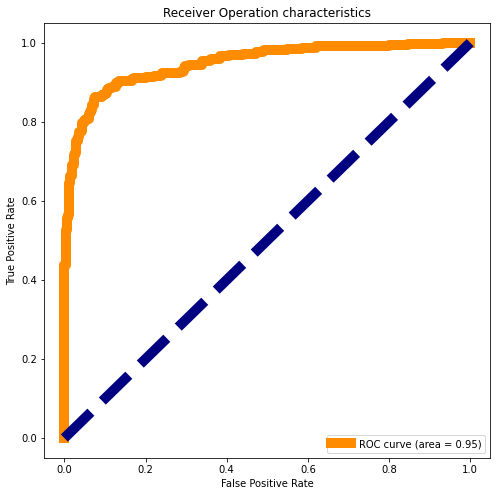

In [204]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [205]:
import pickle

filename = "Employee_attrition.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [206]:
load = pickle.load(open('Employee_attrition.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.8874074074074074


### Conclusion

In [207]:
conclusion = pd.DataFrame()
conclusion['Predicted Attrition of Employees'] = np.array(model.predict(x_test))
conclusion['Actual Attrition of Employees'] = np.array(y_test)

In [208]:
pd.set_option('display.max_rows', None)
conclusion

Predicted Attrition of Employees  Actual Attrition of Employees
0                                   0                              0
1                                   1                              1
2                                   1                              1
3                                   0                              0
4                                   0                              0
5                                   0                              0
6                                   1                              1
7                                   0                              0
8                                   1                              0
9                                   0                              0
10                                  0                              0
11                                  0                              0
12                                  0                              0
13                                  1                              1
14                                  0                              0
15                                  1                              1
16                                  1                              1
17                                  1                              1
18                                  1                              1
19                                  0                              0
20                                  1                              1
21                                  1                              1
22                                  0                              0
23                                  1                              1
24                                  1                              1
25                                  1                              1
26                                  0                              0
27                                  0                              0
28                                  0                              0
29                                  0                              0
30                                  0                              1
31                                  0                              0
32                                  1                              1
33                                  1                              1
34                                  1                              1
35                                  0                              0
36                                  0                              0
37                                  1                              1
38                                  0                              0
39                                  0                              0
40                                  0                              0
41                                  0                              1
42                                  1                              1
43                                  1                              1
44                                  1                              1
45                                  0                              0
46                                  1                              1
47                                  1                              1
48                                  1                              1
49                                  0                              0
50                                  0                              0
51                                  0                              0
52                                  1                              1
53                                  1                              1
54                                  1                              1
55                                  0                              0
56                                  1                              1
57 